<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
<img src="https://misk.org.sa/miskacademy/wp-content/uploads/sites/5/2019/04/ma-logo-1.png" style="float: left; margin: 20px; height: 55px">

## Exploratory Data Analysis 

## corona

Corona virus as a Middle East Respiratory Syndrome (MERS) considered being a new complicated disease; it infects the epithelial cells in the respiratory and/or intestinal tracts, thus causing disease in epidemic proportions.

Data has been collected from different sources and cases are reported through daily bulletins, so we have updated the data several times. The data was collected gathered since March 2012 to the end of November 2015. Data collection was based on various publications (Each organization publishes in a different ways). Each publication mentions the characteristics of the infected cases and updates the previous cases (dead or recovered) by mentioning their characteristics. Based on these bulletins, we update and match the data. Thus, the missing data is for cases that have not been updated and their condition was unknown.


In [239]:
import pandas as pd 
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
from scipy import stats
from scipy.stats import chisquare
import numpy.ma as ma

## Cleaning data

1-Translate Data from Arabic to English.

2-Split the date columns to Year and month. 

3-Fill Nans in 'infection causes' column with unknown.

4-Fill Nans in 'Medical state before' column with unknown.

5-Fill Nans in Medical state After column with unknown (431 observations),we found that the number of the patient has a chronic diseases or medical condition and get Died (106 observations) we replace unknown by Critical and if the patient has a good condition and get recovered(29 observations)we replace unknown by stable.

6- convert  age of infant to Zeroes.

7- Fill Nans in 'Traveling' cloumn with No.(it was mentioned whether the patient traveled before he was infected or not in his medical record)

8-Fill Nans in 'contact with animal' cloumn with No.also we can fill the missing value with (No) for the same reason

9- Fill Nans in 'City' cloumn by the most frequntley city that has cases in the country

10- convert " " to Nans.

11- impute the Nans in 'Age' column by the mean.

In [240]:
## reading the data and explore the columns names

In [241]:
cor=pd.read_excel('corona data.xlsx')

In [242]:
## the dataset contain 1525 raw and 21 feature
cor.shape

(1525, 21)

In [243]:
cor.columns

Index(['المشترك', 'تاريخ النشر بالمنظمة', 'تاريخ النشر بوزارة الصحة',
       'Unnamed: 3', 'تاريخ الاصابة ', 'الدولة', 'المنطقة', 'شهر الإصابة',
       'الفصل', 'الجنس', 'العمر ', 'عدوى', 'سفر', 'علاقة بالحيوانات',
       'الحالة الصحية قبل المرض', 'الحالة الصحية', 'وفاة/ علاج 2',
       'تاريخ الوفاة ', 'شهر الوفاة / العلاج', 'ملاحظات', 'Unnamed: 20'],
      dtype='object')

In [244]:
## rename the columns
cor.rename(columns={ "تاريخ الاصابة ": "Date_of_infection ","الدولة": "Country", "المنطقة": "City","الفصل": "Season", "الجنس": "Sex","العمر ":"Age", "عدوى": "Infection_Causes","سفر": "Traveling", "علاقة بالحيوانات": "Contact_Animal","الحالة الصحية قبل المرض": "Medical_state_before", "وفاة/ علاج 2": "Deaths_or_recovered","الحالة الصحية": "Medical_state_after","تاريخ الوفاة ": "Date_death", "ملاحظات": "Notes","شهر الوفاة / العلاج": "Month_of_death_recovered", "شهر الإصابة": "Month_of_infection","تاريخ النشر بالمنظمة": "Date_of_pub_WHO", "تاريخ النشر بوزارة الصحة": "Date_of_pub_minister","Unnamed: 3":"ID"}, inplace = True)

In [245]:
## convert some columns to_datetime 
cor['Month_of_infection']=cor['Month_of_infection'].apply(lambda x: pd.to_datetime(x))
cor["Month_of_death_recovered"]=cor["Month_of_death_recovered"].apply(lambda x: pd.to_datetime(x))

In [246]:
cor.head()

,المشترك,Date_of_pub_WHO,Date_of_pub_minister,ID,Date_of_infection,Country,City,Month_of_infection,Season,Sex,...,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Date_death,Month_of_death_recovered,Notes,Unnamed: 20
0,NaN,NaN,2012-09-23 00:00:00,1.0,2012-09-03 00:00:00,قطر,الدوحة,2012-09-01,الخريف,ذكر,...,NaN,السعودية,NaN,جيدة,NaN,وفاة,2015-06-28 00:00:00,2013-06-01,NaN,NaN
1,NaN,NaN,NaN,2.0,يونيو,السعودية,عسير,2012-06-01,الصيف,ذكر,...,NaN,NaN,جمال,NaN,NaN,وفاة,يونيو,2012-06-01,NaN,NaN
2,NaN,NaN,2012-11-23 00:00:00,3.0,اكتوبر,قطر,الدوحة,2012-10-01,الخريف,ذكر,...,NaN,NaN,NaN,NaN,NaN,علاج,NaN,NaT,تلقى العلاج في المانيا,NaN
3,NaN,NaN,NaN,4.0,2013-10-05 00:00:00,السعودية,الاحساء,2012-10-01,الخريف,ذكر,...,NaN,NaN,NaN,NaN,NaN,وفاة,2013-10-23 00:00:00,2012-10-01,NaN,NaN
4,NaN,NaN,NaN,5.0,اكتوبر -,السعودية,الاحساء,2012-10-01,الخريف,ذكر,...,اتصال مباشر,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [247]:
cor.tail()

,المشترك,Date_of_pub_WHO,Date_of_pub_minister,ID,Date_of_infection,Country,City,Month_of_infection,Season,Sex,...,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Date_death,Month_of_death_recovered,Notes,Unnamed: 20
1520,وزارة,NaN,21-1-1437,1521.0,2015-11-04 00:00:00,السعودية,الرياض,2015-11-01,الخريف,ذكر,...,NaN,NaN,NaN,NaN,مستقرة,وفاة,2015-11-11 00:00:00,2015-11-01,29 محرم,NaN
1521,وزارة,NaN,30-1-1437,1522.0,2015-11-13 00:00:00,السعودية,الرياض,2015-11-01,الخريف,ذكر,...,الجو,NaN,NaN,NaN,حرجة,علاج,2015-11-23 00:00:00,2015-11-01,11 صفر,NaN
1522,وزارة,NaN,17 صفر,1523.0,2015-11-29 00:00:00,السعودية,بريدة,2015-11-01,الخريف,أنثى,...,NaN,NaN,NaN,NaN,حرجة,نعم,NaN,NaT,NaN,NaN
1523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [248]:
##we find that there are two empty raws
cor[cor.Month_of_infection.isnull()]

,المشترك,Date_of_pub_WHO,Date_of_pub_minister,ID,Date_of_infection,Country,City,Month_of_infection,Season,Sex,...,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Date_death,Month_of_death_recovered,Notes,Unnamed: 20
1523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [249]:
## drop that emptey two raw  
cor=cor.drop([1523,1524],axis=0)

In [250]:
## after deletting the empty raws,the dataset contain 1523 raw and 21 feature
cor.shape

(1523, 21)

In [251]:

cor.dtypes

المشترك                             object
Date_of_pub_WHO                     object
Date_of_pub_minister                object
ID                                 float64
Date_of_infection                   object
Country                             object
City                                object
Month_of_infection          datetime64[ns]
Season                              object
Sex                                 object
Age                                 object
Infection_Causes                    object
Traveling                           object
Contact_Animal                      object
Medical_state_before                object
Medical_state_after                 object
Deaths_or_recovered                 object
Date_death                          object
Month_of_death_recovered    datetime64[ns]
Notes                               object
Unnamed: 20                         object
dtype: object

In [252]:
## check missing value
cor.isnull().sum().sort_values()

ID                             0
Country                        0
Month_of_infection             0
Sex                            4
Season                         5
Age                            9
City                         150
Date_of_infection            314
Deaths_or_recovered          326
Medical_state_after          436
Month_of_death_recovered     640
Medical_state_before         663
Infection_Causes             681
Date_death                   758
Date_of_pub_minister         871
المشترك                      948
Notes                       1000
Contact_Animal              1153
Date_of_pub_WHO             1401
Traveling                   1457
Unnamed: 20                 1510
dtype: int64

In [253]:
percent_missing = cor.isnull().sum() * 100 / len(cor)
percent_missing

المشترك                     62.245568
Date_of_pub_WHO             91.989494
Date_of_pub_minister        57.189757
ID                           0.000000
Date_of_infection           20.617203
Country                      0.000000
City                         9.848982
Month_of_infection           0.000000
Season                       0.328299
Sex                          0.262640
Age                          0.590939
Infection_Causes            44.714380
Traveling                   95.666448
Contact_Animal              75.705844
Medical_state_before        43.532502
Medical_state_after         28.627708
Deaths_or_recovered         21.405121
Date_death                  49.770190
Month_of_death_recovered    42.022324
Notes                       65.659882
Unnamed: 20                 99.146422
dtype: float64

In [254]:
cor.Date_of_pub_WHO.nunique()

109

In [255]:
cor.Date_of_pub_minister.nunique()

419

In [256]:
cor[cor.Month_of_death_recovered.isnull()]


,المشترك,Date_of_pub_WHO,Date_of_pub_minister,ID,Date_of_infection,Country,City,Month_of_infection,Season,Sex,...,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Date_death,Month_of_death_recovered,Notes,Unnamed: 20
2,NaN,NaN,2012-11-23 00:00:00,3.0,اكتوبر,قطر,الدوحة,2012-10-01,الخريف,ذكر,...,NaN,NaN,NaN,NaN,NaN,علاج,NaN,NaT,تلقى العلاج في المانيا,NaN
4,NaN,NaN,NaN,5.0,اكتوبر -,السعودية,الاحساء,2012-10-01,الخريف,ذكر,...,اتصال مباشر,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
11,NaN,NaN,2013-02-16 00:00:00,12.0,يناير,بريطانيا,NaN,2013-01-01,الشتاء,أنثى,...,اتصال مباشر,NaN,NaN,NaN,NaN,علاج,NaN,NaT,NaN,NaN
24,NaN,NaN,2013-05-03 00:00:00,25.0,2013-04-27 00:00:00,السعودية,الاحساء,2013-04-01,الربيع,أنثى,...,NaN,NaN,NaN,أمراض مزمنة,مستقرة,NaN,NaN,NaT,NaN,NaN
25,NaN,NaN,NaN,26.0,2013-04-30 00:00:00,السعودية,الاحساء,2013-04-01,الربيع,ذكر,...,NaN,NaN,NaN,أمراض مزمنة,حرجة,NaN,NaN,NaT,NaN,NaN
26,NaN,NaN,NaN,27.0,2013-04-28 00:00:00,السعودية,الاحساء,2013-04-01,الربيع,ذكر,...,اتصال مباشر,NaN,NaN,NaN,حرجة,NaN,NaN,NaT,NaN,NaN
29,NaN,NaN,NaN,30.0,2013-05-01 00:00:00,السعودية,الاحساء,2013-05-01,الربيع,أنثى,...,NaN,NaN,NaN,أمراض مزمنة,حرجة,NaN,NaN,NaT,NaN,NaN
32,NaN,NaN,NaN,33.0,2013-04-06 00:00:00,السعودية,الاحساء,2013-04-01,الربيع,ذكر,...,الجو,NaN,NaN,NaN,NaN,علاج,NaN,NaT,NaN,NaN
33,NaN,NaN,2013-05-12 00:00:00,34.0,NaN,فرنسا,باريس,2013-05-01,الربيع,ذكر,...,الجو,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
35,NaN,NaN,NaN,36.0,24 ابريل,السعودية,المنطقةالشرقية,2013-04-01,الربيع,ذكر,...,الجو,NaN,NaN,NaN,حرجة,NaN,NaN,NaT,NaN,NaN


In [257]:
## read every columns value to rename it 

In [258]:
cor.Infection_Causes.unique()

array([nan, 'اتصال مباشر', 'عامل صحي', 'الجو', ' ', 'الجو ', 'عامل صحي ',
       ' اتصال مباشر', 'عامل صحي +اتصال مباشر'], dtype=object)

In [259]:
## The total number of ' '  (a space) in "Infection_Causes" column 
cor.Infection_Causes[cor.Infection_Causes==" "].count()

136

In [260]:
cor.Medical_state_before.unique()

array(['جيدة ', nan, 'أمراض مزمنة', 'مدخن ', 'أمراض مزمنة ', ' ',
       'أمراض اخرى ', 'سرطان بالدم', 'عيوب خلقية', 'ورم بالمخ',
       'سرطان الغدد اللمفاوية', 'لا', 'مرض مزمن', ' أمراض مزمنة',
       'أمراض أخرى', 'مدخن+أمراض مزمنة', 'حامل ', 'مدخن + أمراض مزمنة ',
       'مدخن', 'ألم صدر و حرارة + أمراض مزمنة ', 'حامل', 'امراض مزمنة ',
       'امراض مزمنة'], dtype=object)

In [261]:
cor['Age'].unique()

array([49, 60, nan, 70, 16, 31, 39, 25, 40, 69, 73, 59, 24, 87, 58, 94,
       56, 53, 50, 33, 62, 71, 64, 48, 51, 81, 45, 43, 34, 35, 63, 85, 76,
       77, 61, 14, 83, 75, 21, 65, 68, 46, 42, 2, 29, 41, 32, 7, 15, 66,
       82, 26, 28, 30, 67, 54, 55, 38, 79, 47, 74, 19, 3, 18, 78, 23, 72,
       52, 37, 8, 57, 27, 22, 86, 90, 44, 4, 13, 88, 17, 89, 11, 80, 36,
       '9 اشهر', 10, 84, 20, 99, 91, 93, 98, 109, '10 شهور'], dtype=object)

In [262]:
## The total number of ' '  (a space) in "Medical_state_before" column 
cor.Medical_state_before[cor.Medical_state_before==" "].count()

147

In [263]:
cor.Season.unique()

array(['الخريف', 'الصيف', 'الربيع', 'الشتاء', nan, 'خريف', 'شتاء'],
      dtype=object)

In [264]:
cor.City.unique()

array(['الدوحة', 'عسير', 'الاحساء', 'الزرقاء', nan, 'الرياض', 'ابوظبي',
       'باريس', 'المنطقةالشرقية', 'القصيم', 'توسكانا', 'حفرالباطن',
       'الطائف', 'واديالدواسر', 'جدة', 'المدينةالمنورة', 'الجوف',
       'الشارقة', 'دبي', 'منطقةالباطنة', 'الأحساء', 'مسقط', 'جوهور',
       'القريات', 'نجران', 'تبوك', 'مكةالمكرمة', 'الخرج', 'مصر', 'حضرموت',
       'أبوظبي', 'لبنان', 'عمّان', 'القنفذة', 'كرمان', 'الجزائر',
       'المخواة', 'الظهران', 'الدلم', 'الدمام', 'بيشة', 'وادي الدواسر',
       'عرعر', 'وادي الداوسر', 'الجبيل', 'فيينا', 'الحناكية', 'قيا',
       'حرض', 'هاتاي', 'حوايا', 'حوطة بني تميم', 'سكاكا', 'رفحاء',
       'بريدة', 'منطقةالداخلة', 'الشحانية', 'الهفوف', 'الخبر', 'الرس',
       'البدايع', 'المدينة', 'عنيزة', 'القويعية', 'العيون', 'شقراء',
       'الخفجي', 'تيماء', 'مكه', 'حائل', 'ضبا', 'خميس مشيط', 'كهنوج',
       'ابقيق', 'حريملاء', 'العين', 'الأفلاج', 'إنشيون', 'هونجكونج',
       'ظاهر', 'عسفان', 'تربة', 'بانكوك', 'مانيلا', 'القحمة', 'رنية',
       'أبها', 'الزلفي', 'ا

In [265]:
cor.City.nunique()

96

In [266]:
cor.Deaths_or_recovered.unique()

array(['وفاة', 'علاج', nan, 'نعم', 'لا', 'وفاة ', 'uncassified'],
      dtype=object)

In [267]:
cor.Sex.unique()

array(['ذكر', 'أنثى', nan, 'ذكر '], dtype=object)

In [268]:
cor.Deaths_or_recovered.unique()

array(['وفاة', 'علاج', nan, 'نعم', 'لا', 'وفاة ', 'uncassified'],
      dtype=object)

In [269]:
cor.Country.unique()

array(['قطر', 'السعودية', 'قطر ', 'الاردن', 'بريطانيا', 'الإمارات',
       'فرنسا', 'تونس', 'ايطاليا', 'عمان', 'اسبانيا', 'عمان ', 'الكويت',
       'الكويت ', 'السعودية ', 'الإمارات ', 'الأردن  ', 'ماليزيا',
       'اليونان', 'مصر', 'الأردن', 'امريكا', 'اليمن ', 'هولندا ', 'لبنان',
       'إيران', 'الجزائر ', 'النمسا', 'تركيا', 'ألمانيا', 'كوريا',
       'الصين', 'تايلاند', 'الفلبين'], dtype=object)

In [270]:
cor.Medical_state_after.unique()

array([nan, 'مستقرة', 'حرجة', 'مستقرة ', 'بدون أعراض', 'مستقر', 'حرج',
       'حرجة ', 'نعم'], dtype=object)

In [271]:
cor.Traveling.unique()

array(['السعودية', nan, 'الإمارات', 'الاردن', 'عمان', 'السعودية ',
       'الخليج ', 'القنفذة', 'جدة', 'مكة', 'جدة ', 'أبها', 'الرياض',
       'الأحساء', 'الدمام', 'اليمن', 'حفر الباطن', 'نجران',
       'وادي الدواسر', 'أبو ظبي ', 'المدينة', 'عبري ',
       'البحرين - الإمارات - السعودية - قطر - كوريا',
       'الرياض - جدة - الدمام - دبي - ماليزيا -سنغافورة - ', 'عمّان  ',
       'عمّان', 'عمّان ', 'الجمال', ' الرياض', ' الأردن', ' الفلبين',
       'الابل والغنم'], dtype=object)

In [272]:
cor.Contact_Animal.unique()

array([nan, 'جمال', 'لا', 'حيوانات', 'جمال ', 'يوجد', ' ',
       'اختلاط محتمل ', 'نعم', 'شرب حليب ابل', 'حمام', 'أغنام', 'ابل',
       'قريب من مزرعة جمال', 'الجمال', ' جمال', 'لايوجد'], dtype=object)

In [273]:
## The total number of ' '  (a space) in "Contact_Animal" column 
cor.Contact_Animal[cor.Contact_Animal==" "].count()

259

In [274]:
## columns with a space value and it is actully a NaNs: Contact_Animal has 259, Medical_state_before has 147, 
## Infection_Causes has 136

In [275]:
## rename the value of each columns  (there are diffrent names for the same thing)  

In [276]:
cor['Country']=cor['Country'].replace({'السعودية':'Saudi Arabia','السعودية ':'Saudi Arabia','الاردن':'Jordan','الأردن  ':'Jordan','الأردن':'Jordan','تونس':'Tunisia','ايطاليا':'Italy','فرنسا':'France','بريطانيا':'United Kingdom','الامارات':'United Arab Emirates','الإمارات':'United Arab Emirates','الامارات ':'United Arab Emirates','الإمارات ':'United Arab Emirates','عمان':'Oman','عمان ':'Oman','إيران':'Iran','كوريا':'South Korea','امريكا':'United States','هولندا ':'Netherlands','لبنان':'Lebanon','مصر':'Egypt','الصين':'China','ماليزيا':'Malaysia','تايلاند':'Thailand','الفلبين':'Philippines','الجزائر ':'Algeria','ألمانيا':'Germany','النمسا':'Austria','اسبانيا':'Spain','اليونان':'Greece','قطر':'Qatar','قطر ':'Qatar','الكويت':'Kuwait','الكويت ':'Kuwait','اليمن ':'Yemen','تركيا':'Turkey'})

In [277]:
cor['City']=cor['City'].replace({'الرياض':'Riyadh','ابقيق':'Abqaiq','أبها':'Abha','ابوظبي':'Abu dhabi','أبوظبي':'Abu dhabi','الاحساء':'Alhasa','الأحساء':'Alhasa','الأفلاج':'Aflaj','الباحة':'Albahah','البدايع':'Albadaya','الجبيل':'Jubail','الجزائر':'Algeria','الجوف':'Aljouf','الحناكية':'Alhanakiah','الخبر':'Khobar','الخرج':'AlKharj','الخفجي':'Alkhafji','الدلم':'Aldilam','الدمام':'Dammam','الدوحة':'Doha','الرس':'Alras','الزرقاء':'Zraqa','الزلفي':'Alzulfi','الشارقة':'Sharjah','الشحانية':'Shahanea','الطائف':'Taif','الظهران':'Dahran','العين':'AlAin','العيون':'Aloyon','القحمة':'AlQahmah','القريات':'Quriyat','القصيم':'Qassim','القنفذة':'Qunfudhah','القويعية':'Quwaiya','المخواة':'Almkwhah ','المدينةالمنورة':'Madinah','المدينة المنورة ':'Madinah','المدينة المنورة':'Madinah','المدينة':'Madinah','المنطقةالشرقية':'Eastren Region','الهفوف':'Hafuf','إنشيون':'Incheon','باريس':'Paris','بانكوك':'Bangkok','بريدة':'Buraidah','بيشة':'Bisha','تبوك':'Tabuk','تربة':'Tarabh','توسكانا':'Toscana','تيماء':'Taima','جدة':'Jeddah','جوهور':'Johor','حائل':'Hail','حرض':'Harad','حريملاء':'Huraymila','حضرموت':'Hadramout','حفرالباطن':'Hafar AlBatin','حوايا':'Hawaya','حوطة بني تميم':'Hawtat bni Tamim','خميسمشيط':'Khamis Mushait','دبي':'Dubai','رفحاء':'Rafha','رنية':'Runiah','سكاكا':'Skaka','شقراء':'Shaqra','ضبا':'Duba','ظاهر':'Daher','عرعر':'Arar','عسفان':'Asfan','عسير':'Asir','عمّان':'Amman','عنيزة':'Onaizah','فيينا':'Vienna','قيا':'Qiya','كرمان':'Kerman','كهنوج':'Kahnuj','لبنان':'Lebanon','مانيلا':'Manila','مسقط':'Muscat','مصر':'Cairo','مكةالمكرمة':'Mecca','منطقةالباطنة':'Batinah','منطقةالداخلة':'Dakhla','نجران':'Najran','هاتاي':'Hatay','هونجكونج':'Hong Kong','واديالدواسر':'Wadi aldawaser','وادي الداوسر':'Wadi aldawaser','الإحساء':'Alhasa','وادي الدواسر':'Wadi aldawaser','مكه':'Mecca','الكويت':'Kuwait','كوريا':'South Korea','القويحه':'Qwaiha','عفيف':'Afif','الدوادمي':'Al-Dawadmi','النماص':'Alnumas','خميس مشيط':'Khamis Mushait','عّمان':'Amman'})

In [278]:
cor['Infection_Causes']=cor['Infection_Causes'].replace({'اتصال مباشر':'Direct Contact','عامل صحي':'Healthcare Worker','الجو':'Air',' ':np.nan,' اتصال مباشر':'Direct Contact','عامل صحي ':'Healthcare Worker','الجو ':'Air','عامل صحي +اتصال مباشر':'Healthcare Worker'})

In [279]:
cor['Season']=cor['Season'].replace({'شتاء':'winter','خريف':'Autumn','الشتاء':'winter','الربيع':'spring','الصيف':'summer','الخريف':'Autumn'})

In [280]:
cor['Sex']=cor['Sex'].replace({'ذكر ':'Male','أنثى':'Female','ذكر':'Male'})

In [281]:
cor['Medical_state_before']=cor['Medical_state_before'].replace({'جيدة ':'good condition','أمراض مزمنة':'chronic diseases','امراض مزمنة ':'chronic diseases','امراض مزمنة':'chronic diseases','مصاب بحالة طبية كامنة ':'medical condition','مصابة بحالة طبية كامنة ':'medical condition','اعراض تنفسية خفيفة ':'Mild respiratory symptoms','أمراض أخرى':'medical condition','مدخن ':'Smoker','أمراض مزمنة ':'chronic diseases','أمراض اخرى ':'medical condition','سرطان بالدم':'medical condition','عيوب خلقية':'medical condition','ورم بالمخ':'medical condition','سرطان الغدد اللمفاوية':'medical condition','مرض مزمن':'chronic diseases',' أمراض مزمنة':'chronic diseases','حامل ':'pregnant','حامل':'pregnant','مدخن':'Smoker','مدخن+أمراض مزمنة':'chronic diseases','مدخن + أمراض مزمنة ':'chronic diseases','لا':'good condition','ألم صدر و حرارة + أمراض مزمنة ':'medical condition',' ':np.nan})

In [282]:
cor['Deaths_or_recovered']=cor['Deaths_or_recovered'].replace({'علاج':'recovered','وفاة':'death','وفاة ':'death','نعم':'death','لا':'unknown','uncassified':'unknown'})

In [283]:
cor['Medical_state_after']=cor['Medical_state_after'].replace({'حرج':'Critical','مستقر':'Stable','بدون أعراض':'Stable','مستقرة ':'Stable','حرجة':'Critical','مستقرة':'Stable','حرجة ':'Critical','نعم':'yes'})

In [284]:
cor['Traveling']=cor['Traveling'].replace({'السعودية ':'Saudi Arabia','السعودية':'Saudi Arabia','الامارات':'United Arab Emirates','الاردن':'Jordan','عمان':'Oman','الخليج ':'Gulf Country','القنفذة':'Saudi Arabia','جدة':'Saudi Arabia','مكة':'Saudi Arabia','جدة ':'Saudi Arabia','أبها':'Saudi Arabia','الرياض':'Saudi Arabia','الأحساء':'Saudi Arabia','الدمام':'Saudi Arabia','اليمن':'Yemen','حفر الباطن':'Saudi Arabia','نجران':'Saudi Arabia','وادي الدواسر':'Saudi Arabia','أبو ظبي ':'United Arab Emirates','المدينة':'Saudi Arabia','عبري ':'Oman','البحرين - الإمارات - السعودية - قطر - كوريا':'Bahrain - United Arab Emirates - Saudi Arabia - Qatar - Korea','الرياض - جدة - الدمام - دبي - ماليزيا -سنغافورة - ':'Singapore - Malaysia - Dubai -Saudi Arabia',' الرياض':'Saudi Arabia','الإمارات':'United Arab Emirates','عمّان  ':'Jordan','عمّان':'Jordan','عمّان ':'Jordan',' الأردن':'Jordan',' الفلبين':'Philippines'})

In [285]:
cor['Contact_Animal']=cor['Contact_Animal'].replace({'جمال':'Yes','لا':'No','لايوجد':'No','حيوانات':'Yes','جمال ':'Yes','يوجد':'Yes','اختلاط محتمل ':'Yes','نعم':'Yes','شرب حليب ابل':'Yes','حمام':'Yes','أغنام':'Yes','ابل':'Yes','قريب من مزرعة جمال':'Yes','الجمال':'Yes',' جمال':'Yes',' ':np.nan})

In [286]:
##  the age of infant to Zeroes.

In [287]:
cor['Age']=cor['Age'].replace({'9 اشهر': 0,'10 شهور':0})

In [288]:
## drop some unusful columns

In [289]:
del cor['المشترك']

In [290]:
del cor['Date_of_pub_WHO']

In [291]:
del cor['Date_of_pub_minister']

In [292]:
del cor['Date_death']

In [293]:
del cor['Date_of_infection ']

In [294]:
## Split the date columns to Year and month. 

In [295]:
cor['Infection_Month']=cor["Month_of_infection"].dt.month
cor['Infection_Year']=cor["Month_of_infection"].dt.year
cor['Death_Month']=cor["Month_of_death_recovered"].dt.month
cor['Death_Year']=cor["Month_of_death_recovered"].dt.year
cor['Infection_Month'] = cor['Infection_Month'].astype(int)
cor['Infection_Year'] = cor['Infection_Year'].astype(int)

In [296]:
cor.head(10)

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
0,1.0,Qatar,Doha,2012-09-01,Autumn,Male,49.0,NaN,Saudi Arabia,NaN,good condition,NaN,death,2013-06-01,NaN,NaN,9,2012,6.0,2013.0
1,2.0,Saudi Arabia,Asir,2012-06-01,summer,Male,60.0,NaN,NaN,Yes,NaN,NaN,death,2012-06-01,NaN,NaN,6,2012,6.0,2012.0
2,3.0,Qatar,Doha,2012-10-01,Autumn,Male,NaN,NaN,NaN,NaN,NaN,NaN,recovered,NaT,تلقى العلاج في المانيا,NaN,10,2012,NaN,NaN
3,4.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,70.0,NaN,NaN,NaN,NaN,NaN,death,2012-10-01,NaN,NaN,10,2012,10.0,2012.0
4,5.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,16.0,Direct Contact,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,10,2012,NaN,NaN
5,6.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,31.0,Direct Contact,NaN,NaN,NaN,NaN,recovered,2013-11-01,NaN,NaN,10,2012,11.0,2013.0
6,7.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,39.0,Direct Contact,NaN,NaN,NaN,NaN,death,2012-11-01,NaN,NaN,10,2012,11.0,2012.0
7,8.0,Jordan,Zraqa,2012-03-01,spring,Male,25.0,NaN,NaN,NaN,NaN,NaN,death,2013-04-01,NaN,NaN,3,2012,4.0,2013.0
8,9.0,Jordan,Zraqa,2012-04-01,spring,Female,40.0,Healthcare Worker,NaN,NaN,NaN,NaN,death,2013-04-01,NaN,NaN,4,2012,4.0,2013.0
9,10.0,United Kingdom,NaN,2013-01-01,winter,Male,60.0,NaN,Saudi Arabia,NaN,NaN,NaN,death,2013-02-01,NaN,NaN,1,2013,2.0,2013.0


In [297]:
##missing values
cor.isnull().sum().sort_values()

ID                             0
Country                        0
Month_of_infection             0
Infection_Year                 0
Infection_Month                0
Sex                            4
Season                         5
Age                            9
City                         150
Deaths_or_recovered          326
Medical_state_after          436
Month_of_death_recovered     640
Death_Year                   640
Death_Month                  640
Medical_state_before         810
Infection_Causes             817
Notes                       1000
Contact_Animal              1412
Traveling                   1457
Unnamed: 20                 1510
dtype: int64

In [298]:
percent_missing1 = cor.isnull().sum() * 100 / len(cor)
percent_missing1

ID                           0.000000
Country                      0.000000
City                         9.848982
Month_of_infection           0.000000
Season                       0.328299
Sex                          0.262640
Age                          0.590939
Infection_Causes            53.644123
Traveling                   95.666448
Contact_Animal              92.711753
Medical_state_before        53.184504
Medical_state_after         28.627708
Deaths_or_recovered         21.405121
Month_of_death_recovered    42.022324
Notes                       65.659882
Unnamed: 20                 99.146422
Infection_Month              0.000000
Infection_Year               0.000000
Death_Month                 42.022324
Death_Year                  42.022324
dtype: float64

In [299]:
cor.head()

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
0,1.0,Qatar,Doha,2012-09-01,Autumn,Male,49.0,NaN,Saudi Arabia,NaN,good condition,NaN,death,2013-06-01,NaN,NaN,9,2012,6.0,2013.0
1,2.0,Saudi Arabia,Asir,2012-06-01,summer,Male,60.0,NaN,NaN,Yes,NaN,NaN,death,2012-06-01,NaN,NaN,6,2012,6.0,2012.0
2,3.0,Qatar,Doha,2012-10-01,Autumn,Male,NaN,NaN,NaN,NaN,NaN,NaN,recovered,NaT,تلقى العلاج في المانيا,NaN,10,2012,NaN,NaN
3,4.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,70.0,NaN,NaN,NaN,NaN,NaN,death,2012-10-01,NaN,NaN,10,2012,10.0,2012.0
4,5.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,16.0,Direct Contact,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,10,2012,NaN,NaN


In [300]:
## there are 9 values are missing in Age column so we impute them by the mean

In [301]:
cor['Age']=np.where(np.isnan(cor.Age), ma.array(cor.Age, mask=np.isnan(cor.Age)).mean(axis=0), cor.Age) 


In [302]:
cor['Age'] = cor['Age'].astype(int)

In [303]:
## find the total number of each value in a column

In [304]:
cor.Country.value_counts(dropna=False)

Saudi Arabia            1176
South Korea              186
United Arab Emirates      78
Jordan                    22
Qatar                     13
Oman                       8
Iran                       6
Kuwait                     6
United States              3
United Kingdom             3
Tunisia                    3
France                     2
Netherlands                2
Algeria                    2
Egypt                      1
Philippines                1
Italy                      1
China                      1
Malaysia                   1
Spain                      1
Lebanon                    1
Germany                    1
Austria                    1
Thailand                   1
Turkey                     1
Yemen                      1
Greece                     1
Name: Country, dtype: int64

In [305]:
cor.Infection_Causes.value_counts(dropna=False)

NaN                  817
Air                  268
Direct Contact       245
Healthcare Worker    193
Name: Infection_Causes, dtype: int64

In [306]:
cor.Season.value_counts(dropna=False)

spring    726
summer    425
winter    185
Autumn    182
NaN         5
Name: Season, dtype: int64

In [307]:
cor.Sex.value_counts(dropna=False)

Male      997
Female    522
NaN         4
Name: Sex, dtype: int64

In [308]:
cor.Medical_state_before.value_counts(dropna=False)

NaN                  810
chronic diseases     664
medical condition     29
good condition        13
Smoker                 5
pregnant               2
Name: Medical_state_before, dtype: int64

In [309]:
cor.Deaths_or_recovered.value_counts(dropna=False)

death        678
recovered    410
NaN          326
unknown      109
Name: Deaths_or_recovered, dtype: int64

In [310]:
cor.Deaths_or_recovered.value_counts(dropna=False, normalize=True).mul(100)

death        44.517400
recovered    26.920552
NaN          21.405121
unknown       7.156927
Name: Deaths_or_recovered, dtype: float64

In [311]:
cor.Medical_state_after.value_counts(dropna=False)

Stable      679
NaN         436
Critical    406
yes           2
Name: Medical_state_after, dtype: int64

In [312]:
cor.City.value_counts(dropna=False)

Riyadh              536
Jeddah              206
NaN                 150
Abu dhabi            70
Incheon              63
Hafuf                56
Madinah              51
Taif                 49
Mecca                36
Eastren Region       28
Alhasa               27
Najran               24
Hafar AlBatin        17
AlKharj              15
Amman                15
Buraidah             13
Tabuk                12
Aljouf               12
Khobar               10
Qunfudhah             9
Asir                  8
Dammam                7
Doha                  6
Zraqa                 5
Jubail                5
Kerman                4
Dahran                4
Kuwait                3
Wadi aldawaser        3
Skaka                 3
                   ... 
Runiah                1
Abha                  1
Alzulfi               1
Kahnuj                1
Vienna                1
Duba                  1
Huraymila             1
Rafha                 1
Harad                 1
Abqaiq                1
Toscana         

In [313]:
##  there are some values  recorded in a wrong column("الجمال" and " الأبل والغنم") 
cor.Traveling.value_counts(dropna=False)

NaN                                                              1457
Saudi Arabia                                                       39
الجمال                                                              9
Jordan                                                              5
Oman                                                                4
United Arab Emirates                                                3
Philippines                                                         1
Singapore - Malaysia - Dubai -Saudi Arabia                          1
Yemen                                                               1
Bahrain - United Arab Emirates - Saudi Arabia - Qatar - Korea       1
الابل والغنم                                                        1
Gulf Country                                                        1
Name: Traveling, dtype: int64

In [314]:
cor.Contact_Animal.value_counts(dropna=False)

NaN    1412
Yes     104
No        7
Name: Contact_Animal, dtype: int64

In [315]:
## to find the number of cases in each country

In [316]:
## Saudi Arabia then South Korea have the most number of infected cases
cor.groupby("Country")["Deaths_or_recovered"].count()

Country
Algeria                   1
Austria                   1
China                     1
Egypt                     1
France                    1
Germany                   1
Greece                    1
Iran                      4
Italy                     0
Jordan                   22
Kuwait                    4
Lebanon                   1
Malaysia                  1
Netherlands               2
Oman                      6
Philippines               1
Qatar                    12
Saudi Arabia            986
South Korea              85
Spain                     1
Thailand                  1
Tunisia                   2
Turkey                    1
United Arab Emirates     54
United Kingdom            3
United States             3
Yemen                     1
Name: Deaths_or_recovered, dtype: int64

In [317]:
##explore the missing value in 'Deaths_or_recovered' column
missing_target = cor[cor.Deaths_or_recovered.isnull()]
missing_target

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
4,5.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,16,Direct Contact,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,10,2012,NaN,NaN
24,25.0,Saudi Arabia,Alhasa,2013-04-01,spring,Female,53,NaN,NaN,NaN,chronic diseases,Stable,NaN,NaT,NaN,NaN,4,2013,NaN,NaN
25,26.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,50,NaN,NaN,NaN,chronic diseases,Critical,NaN,NaT,NaN,NaN,4,2013,NaN,NaN
26,27.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,33,Direct Contact,NaN,NaN,NaN,Critical,NaN,NaT,NaN,NaN,4,2013,NaN,NaN
29,30.0,Saudi Arabia,Alhasa,2013-05-01,spring,Female,58,NaN,NaN,NaN,chronic diseases,Critical,NaN,NaT,NaN,NaN,5,2013,NaN,NaN
33,34.0,France,Paris,2013-05-01,spring,Male,51,Air,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,5,2013,NaN,NaN
35,36.0,Saudi Arabia,Eastren Region,2013-04-01,spring,Male,48,Air,NaN,NaN,NaN,Critical,NaN,NaT,NaN,NaN,4,2013,NaN,NaN
38,39.0,Saudi Arabia,Eastren Region,2013-05-01,spring,Male,45,Healthcare Worker,NaN,NaN,NaN,Critical,NaN,NaT,NaN,NaN,5,2013,NaN,NaN
41,42.0,Tunisia,NaN,2013-05-01,spring,Male,34,Direct Contact,NaN,NaN,NaN,Stable,NaN,NaT,NaN,NaN,5,2013,NaN,NaN
45,46.0,Saudi Arabia,Eastren Region,2013-05-01,spring,Female,85,NaN,NaN,NaN,chronic diseases,Critical,NaN,NaT,NaN,NaN,5,2013,NaN,NaN


In [318]:
## to find the total number of each medical state before get infected for the dead cases

In [319]:
## most of the dead casses have a choronic diseases or have some medical condition
death=cor[cor['Deaths_or_recovered']=="death"]
death1=death["Medical_state_before"].value_counts()
death1

chronic diseases     384
medical condition     16
good condition         3
Smoker                 3
pregnant               2
Name: Medical_state_before, dtype: int64

In [320]:
cor[(cor.Medical_state_before=="chronic diseases")&(cor.Deaths_or_recovered=="death")]

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
10,11.0,United Kingdom,NaN,2013-02-01,winter,Male,51,Direct Contact,NaN,NaN,chronic diseases,NaN,death,2013-02-01,NaN,NaN,2,2013,2.0,2013.0
17,18.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,59,NaN,NaN,NaN,chronic diseases,NaN,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0
18,19.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,24,NaN,NaN,NaN,chronic diseases,Stable,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0
19,20.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,87,NaN,NaN,NaN,chronic diseases,NaN,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0
20,21.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,58,NaN,NaN,NaN,chronic diseases,Critical,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0
21,22.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,94,NaN,NaN,NaN,chronic diseases,NaN,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0
22,23.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,56,NaN,NaN,NaN,chronic diseases,NaN,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0
23,24.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,56,NaN,NaN,NaN,chronic diseases,Critical,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0
27,28.0,Saudi Arabia,Alhasa,2013-04-01,spring,Female,62,NaN,NaN,NaN,chronic diseases,NaN,death,2013-05-01,NaN,NaN,4,2013,5.0,2013.0
28,29.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,71,NaN,NaN,NaN,chronic diseases,NaN,death,2013-05-01,NaN,NaN,4,2013,5.0,2013.0


In [321]:
## to find the total number of each medical state before get infected for the recovered cases

In [322]:
## there are a few number of the recovered casses have a choronic diseases or have some medical condition
recovered=cor[cor['Deaths_or_recovered']=="recovered"]
recovered1=recovered["Medical_state_before"].value_counts()
recovered1

chronic diseases     175
medical condition     11
good condition         5
Smoker                 2
Name: Medical_state_before, dtype: int64

In [323]:
## we find that: there are 352 casses with age more than 41 and have a choronic diseases from the death casses

In [324]:
cor[(cor.Age> 40)&(cor.Deaths_or_recovered=='death')&(cor.Medical_state_before=="chronic diseases")]

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
10,11.0,United Kingdom,NaN,2013-02-01,winter,Male,51,Direct Contact,NaN,NaN,chronic diseases,NaN,death,2013-02-01,NaN,NaN,2,2013,2.0,2013.0
17,18.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,59,NaN,NaN,NaN,chronic diseases,NaN,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0
19,20.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,87,NaN,NaN,NaN,chronic diseases,NaN,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0
20,21.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,58,NaN,NaN,NaN,chronic diseases,Critical,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0
21,22.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,94,NaN,NaN,NaN,chronic diseases,NaN,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0
22,23.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,56,NaN,NaN,NaN,chronic diseases,NaN,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0
23,24.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,56,NaN,NaN,NaN,chronic diseases,Critical,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0
27,28.0,Saudi Arabia,Alhasa,2013-04-01,spring,Female,62,NaN,NaN,NaN,chronic diseases,NaN,death,2013-05-01,NaN,NaN,4,2013,5.0,2013.0
28,29.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,71,NaN,NaN,NaN,chronic diseases,NaN,death,2013-05-01,NaN,NaN,4,2013,5.0,2013.0
30,31.0,France,NaN,2013-04-01,spring,Male,64,NaN,United Arab Emirates,NaN,chronic diseases,NaN,death,2013-05-01,NaN,NaN,4,2013,5.0,2013.0


In [325]:
## describtive of Age
cor.Age.describe()

count    1523.000000
mean       51.303349
std        18.294098
min         0.000000
25%        37.000000
50%        52.000000
75%        65.000000
max       109.000000
Name: Age, dtype: float64

In [326]:
## Fill Nans in 'infections causes' column with unknown

In [327]:
cor['Infection_Causes']=cor.Infection_Causes.fillna(value='unknown')
cor.Infection_Causes.value_counts(dropna=False)

unknown              817
Air                  268
Direct Contact       245
Healthcare Worker    193
Name: Infection_Causes, dtype: int64

In [328]:
## Fill NaNs with (good condition)
##the patient in a good condition if it was not mentioned he has a medical condition in his medical record

In [329]:
cor['Medical_state_before']=cor.Medical_state_before.fillna(value='good condition')
cor.Medical_state_before.value_counts(dropna=False)

good condition       823
chronic diseases     664
medical condition     29
Smoker                 5
pregnant               2
Name: Medical_state_before, dtype: int64

In [330]:
## Fill Nans in 'Deaths_or_recovered' column with unknown

In [331]:
cor['Deaths_or_recovered']=cor.Deaths_or_recovered.fillna(value='unknown')
cor.Deaths_or_recovered.value_counts(dropna=False)

death        678
unknown      435
recovered    410
Name: Deaths_or_recovered, dtype: int64

In [332]:
## Fill Nans in 'Contact_Animal' column with No
##it was mentioned whether the patient Contact with Animal before he was get  infected or not in his medical record

In [333]:
cor['Contact_Animal']=cor.Contact_Animal.fillna(value='No')
cor.Contact_Animal.value_counts(dropna=False)

No     1419
Yes     104
Name: Contact_Animal, dtype: int64

In [334]:
## Fill Nans in 'Traveling' column with No
##it was mentioned whether the patient traveled before he was infected or not in his medical record

In [335]:
cor['Traveling']=cor.Traveling.fillna(value='No')
cor.Traveling.value_counts(dropna=False)

No                                                               1457
Saudi Arabia                                                       39
الجمال                                                              9
Jordan                                                              5
Oman                                                                4
United Arab Emirates                                                3
Philippines                                                         1
Singapore - Malaysia - Dubai -Saudi Arabia                          1
Yemen                                                               1
Bahrain - United Arab Emirates - Saudi Arabia - Qatar - Korea       1
الابل والغنم                                                        1
Gulf Country                                                        1
Name: Traveling, dtype: int64

In [336]:
## explore the 5 miisng values in season

In [337]:
cor[cor.Season.isnull()]

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
461,462.0,Saudi Arabia,Riyadh,2014-04-01,NaN,Female,41,Direct Contact,No,No,good condition,Stable,recovered,NaT,NaN,NaN,4,2014,NaN,NaN
732,733.0,Saudi Arabia,Jubail,2014-08-01,NaN,Male,34,Healthcare Worker,No,No,good condition,Stable,recovered,2014-09-01,5 ذو الحجة,NaN,8,2014,9.0,2014.0
752,753.0,Saudi Arabia,Taif,2014-10-01,NaN,Male,66,unknown,No,No,chronic diseases,NaN,death,2014-10-01,NaN,NaN,10,2014,10.0,2014.0
834,835.0,Saudi Arabia,Riyadh,2015-01-01,NaN,Female,80,unknown,No,No,chronic diseases,Critical,recovered,2015-02-01,NaN,NaN,1,2015,2.0,2015.0
835,836.0,Saudi Arabia,Riyadh,2015-01-01,NaN,Male,37,unknown,No,No,chronic diseases,Critical,recovered,2015-02-01,2 جماد الأول,NaN,1,2015,2.0,2015.0


In [338]:
## fill the NaNs based on the 'Month_of_infection' column

In [339]:
cor.loc[(cor.ID==462.0), 'Season'] = 'spring'
cor.loc[(cor.ID==733.0), 'Season'] = 'summer'
cor.loc[(cor.ID==753.0), 'Season'] = 'Autumn'
cor.loc[(cor.ID==835.0), 'Season'] = 'winter'
cor.loc[(cor.ID==836.0), 'Season'] = 'winter'

In [340]:
cor.Season.value_counts( )

spring    727
summer    426
winter    187
Autumn    183
Name: Season, dtype: int64

In [341]:
## there are  mistakes from the data collecter (the value"الجمال" belong to the contact with animal columns not in traveling ) 

In [342]:
## find the raws that contain 'الجمال' in 'Traveling'
cor[cor.Traveling=='الجمال']

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
1393,1394.0,Saudi Arabia,Riyadh,2015-08-01,summer,Male,55,unknown,الجمال,No,chronic diseases,Stable,recovered,2015-10-01,21 ذو الحجة,NaN,8,2015,10.0,2015.0
1396,1397.0,Saudi Arabia,Riyadh,2015-08-01,summer,Male,50,unknown,الجمال,No,chronic diseases,Stable,recovered,2015-09-01,28 ذو القعدة,NaN,8,2015,9.0,2015.0
1404,1405.0,Saudi Arabia,Hafuf,2015-08-01,summer,Male,65,unknown,الجمال,No,chronic diseases,Critical,recovered,2015-09-01,2015-11-22 00:00:00,NaN,8,2015,9.0,2015.0
1408,1409.0,Saudi Arabia,Riyadh,2015-08-01,summer,Male,45,unknown,الجمال,No,chronic diseases,Critical,recovered,2015-09-01,15 ذو الحجة,NaN,8,2015,9.0,2015.0
1415,1416.0,Saudi Arabia,Riyadh,2015-09-01,summer,Male,73,unknown,الجمال,No,chronic diseases,Critical,recovered,2015-09-01,26 ذو القعدة,NaN,9,2015,9.0,2015.0
1437,1438.0,Saudi Arabia,Al-Dawadmi,2015-08-01,summer,Male,61,unknown,الجمال,No,chronic diseases,Stable,death,NaT,NaN,NaN,8,2015,NaN,NaN
1439,1440.0,Saudi Arabia,Riyadh,2015-08-01,summer,Female,58,unknown,الجمال,No,chronic diseases,Critical,death,2015-10-01,28 ذو الحجة,NaN,8,2015,10.0,2015.0
1458,1459.0,Kuwait,Kuwait,2015-09-01,Autumn,Male,78,unknown,الجمال,No,chronic diseases,NaN,death,NaT,NaN,NaN,9,2015,NaN,NaN
1475,1476.0,Saudi Arabia,Aloyon,2015-09-01,Autumn,Male,46,unknown,الجمال,No,chronic diseases,Stable,death,NaT,NaN,NaN,9,2015,NaN,NaN


In [343]:
## fill the 'contact with animal' by Yes in the same raws 
cor.iloc[1393,9] = 'Yes'
cor.iloc[1396,9] = 'Yes'
cor.iloc[1404,9] = 'Yes'
cor.iloc[1408,9] = 'Yes'
cor.iloc[1415,9] = 'Yes'
cor.iloc[1437,9] = 'Yes'
cor.iloc[1439,9] = 'Yes'
cor.iloc[1458,9] = 'Yes'
cor.iloc[1475,9] = 'Yes'

In [344]:
## find the raws that contain 'الابل والغنم' in 'Traveling'
cor[cor.Traveling=='الابل والغنم']

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
1495,1496.0,Saudi Arabia,Hafuf,2015-10-01,Autumn,Male,37,unknown,الابل والغنم,No,chronic diseases,Critical,death,2015-11-01,19 محرم,NaN,10,2015,11.0,2015.0


In [345]:
## fill the 'contact with animal' by Yes in the same raws 
cor.iloc[1495,9] = 'Yes'

In [346]:
## replace the wrong values in 'Traveling' with No 
cor['Traveling']=cor['Traveling'].replace({'الابل والغنم':'No','الجمال':'No'})

In [347]:
cor.Traveling.value_counts(dropna=False)

No                                                               1467
Saudi Arabia                                                       39
Jordan                                                              5
Oman                                                                4
United Arab Emirates                                                3
Philippines                                                         1
Singapore - Malaysia - Dubai -Saudi Arabia                          1
Yemen                                                               1
Bahrain - United Arab Emirates - Saudi Arabia - Qatar - Korea       1
Gulf Country                                                        1
Name: Traveling, dtype: int64

In [348]:
##  "yes" in "Medical_state_after" column means the patient in a 'Critical' state, so we replace them

In [349]:
cor[cor.Medical_state_after=="yes"]

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
1453,1454.0,Jordan,Amman,2015-08-01,summer,Male,78,Air,No,No,chronic diseases,yes,death,2015-09-01,NaN,NaN,8,2015,9.0,2015.0
1454,1455.0,Jordan,Amman,2015-08-01,summer,Male,53,unknown,No,No,chronic diseases,yes,death,2015-09-01,NaN,NaN,8,2015,9.0,2015.0


In [350]:
cor['Medical_state_after']=cor['Medical_state_after'].replace({'yes':'Critical'})

In [351]:
#### Fill Nans in Medical state After column with unknown (431 observations)

In [352]:
cor['Medical_state_after']=cor.Medical_state_after.fillna(value='unknown')

In [353]:
cor[cor.Medical_state_after=="unknown"]

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
0,1.0,Qatar,Doha,2012-09-01,Autumn,Male,49,unknown,Saudi Arabia,No,good condition,unknown,death,2013-06-01,NaN,NaN,9,2012,6.0,2013.0
1,2.0,Saudi Arabia,Asir,2012-06-01,summer,Male,60,unknown,No,Yes,good condition,unknown,death,2012-06-01,NaN,NaN,6,2012,6.0,2012.0
2,3.0,Qatar,Doha,2012-10-01,Autumn,Male,51,unknown,No,No,good condition,unknown,recovered,NaT,تلقى العلاج في المانيا,NaN,10,2012,NaN,NaN
3,4.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,70,unknown,No,No,good condition,unknown,death,2012-10-01,NaN,NaN,10,2012,10.0,2012.0
4,5.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,16,Direct Contact,No,No,good condition,unknown,unknown,NaT,NaN,NaN,10,2012,NaN,NaN
5,6.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,31,Direct Contact,No,No,good condition,unknown,recovered,2013-11-01,NaN,NaN,10,2012,11.0,2013.0
6,7.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,39,Direct Contact,No,No,good condition,unknown,death,2012-11-01,NaN,NaN,10,2012,11.0,2012.0
7,8.0,Jordan,Zraqa,2012-03-01,spring,Male,25,unknown,No,No,good condition,unknown,death,2013-04-01,NaN,NaN,3,2012,4.0,2013.0
8,9.0,Jordan,Zraqa,2012-04-01,spring,Female,40,Healthcare Worker,No,No,good condition,unknown,death,2013-04-01,NaN,NaN,4,2012,4.0,2013.0
9,10.0,United Kingdom,NaN,2013-01-01,winter,Male,60,unknown,Saudi Arabia,No,good condition,unknown,death,2013-02-01,NaN,NaN,1,2013,2.0,2013.0


In [354]:
##we find that the number of the paitent has a chronich diseases or medical condition and get Died (106 observations),so we replce unknown with Critical and if the paitent has a good condition and get recoverd(29 observations)we replace unknown with stable

In [355]:
cor.Medical_state_after.value_counts(dropna=False)

Stable      679
unknown     436
Critical    408
Name: Medical_state_after, dtype: int64

In [356]:
cor.groupby("Medical_state_after")["Deaths_or_recovered"].value_counts()

Medical_state_after  Deaths_or_recovered
Critical             death                  246
                     recovered               88
                     unknown                 74
Stable               recovered              277
                     death                  202
                     unknown                200
unknown              death                  230
                     unknown                161
                     recovered               45
Name: Deaths_or_recovered, dtype: int64

In [357]:
##most critical cases are dead and most stable cases are recovered
cor.groupby("Medical_state_after")["Deaths_or_recovered"].describe()

,count,unique,top,freq
Medical_state_after,,,,
Critical,408,3,death,246
Stable,679,3,recovered,277
unknown,436,3,death,230


In [358]:
##105 casea from the dead cases have choronic diseases
cor[(cor.Medical_state_after=="unknown")&(cor.Deaths_or_recovered=="death")&(cor.Medical_state_before=="chronic diseases")]

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
10,11.0,United Kingdom,NaN,2013-02-01,winter,Male,51,Direct Contact,No,No,chronic diseases,unknown,death,2013-02-01,NaN,NaN,2,2013,2.0,2013.0
17,18.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,59,unknown,No,No,chronic diseases,unknown,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0
19,20.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,87,unknown,No,No,chronic diseases,unknown,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0
21,22.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,94,unknown,No,No,chronic diseases,unknown,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0
22,23.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,56,unknown,No,No,chronic diseases,unknown,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0
27,28.0,Saudi Arabia,Alhasa,2013-04-01,spring,Female,62,unknown,No,No,chronic diseases,unknown,death,2013-05-01,NaN,NaN,4,2013,5.0,2013.0
28,29.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,71,unknown,No,No,chronic diseases,unknown,death,2013-05-01,NaN,NaN,4,2013,5.0,2013.0
30,31.0,France,NaN,2013-04-01,spring,Male,64,unknown,United Arab Emirates,No,chronic diseases,unknown,death,2013-05-01,NaN,NaN,4,2013,5.0,2013.0
44,45.0,Saudi Arabia,Eastren Region,2013-05-01,spring,Male,56,unknown,No,No,chronic diseases,unknown,death,2013-05-01,NaN,NaN,5,2013,5.0,2013.0
47,48.0,Saudi Arabia,Eastren Region,2013-05-01,spring,Male,77,unknown,No,No,chronic diseases,unknown,death,2013-05-01,NaN,NaN,5,2013,5.0,2013.0


In [359]:
## 2 cases from the dead cases have medical condition
cor[(cor.Medical_state_after=="unknown")&(cor.Deaths_or_recovered=="death")&(cor.Medical_state_before=="medical condition")]

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
508,509.0,Saudi Arabia,Riyadh,2014-04-01,spring,Male,77,Air,No,No,medical condition,unknown,death,2014-05-01,NaN,NaN,4,2014,5.0,2014.0
655,656.0,Saudi Arabia,Jeddah,2014-05-01,spring,Male,74,unknown,No,No,medical condition,unknown,death,2014-05-01,NaN,NaN,5,2014,5.0,2014.0


In [360]:
## 32 cases from the recovered cases in a good condition
cor[(cor.Medical_state_after=="unknown")&(cor.Deaths_or_recovered=="recovered")&(cor.Medical_state_before=="good condition")].shape

(32, 20)

In [361]:
cor[(cor.Medical_state_after=="unknown")&(cor.Deaths_or_recovered=="recovered")&(cor.Medical_state_before=="good condition")]

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
2,3.0,Qatar,Doha,2012-10-01,Autumn,Male,51,unknown,No,No,good condition,unknown,recovered,NaT,تلقى العلاج في المانيا,NaN,10,2012,NaN,NaN
5,6.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,31,Direct Contact,No,No,good condition,unknown,recovered,2013-11-01,NaN,NaN,10,2012,11.0,2013.0
11,12.0,United Kingdom,NaN,2013-01-01,winter,Female,51,Direct Contact,No,No,good condition,unknown,recovered,NaT,NaN,NaN,1,2013,NaN,NaN
15,16.0,Saudi Arabia,Riyadh,2013-03-01,spring,Male,51,Direct Contact,No,No,good condition,unknown,recovered,2013-03-01,NaN,NaN,3,2013,3.0,2013.0
32,33.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,58,Air,No,No,good condition,unknown,recovered,NaT,NaN,NaN,4,2013,NaN,NaN
37,38.0,Saudi Arabia,Eastren Region,2013-05-01,spring,Male,56,Air,No,No,good condition,unknown,recovered,NaT,NaN,NaN,5,2013,NaN,NaN
62,63.0,Saudi Arabia,Eastren Region,2013-06-01,spring,Female,43,unknown,No,No,good condition,unknown,recovered,NaT,NaN,NaN,6,2013,NaN,NaN
63,64.0,Saudi Arabia,Taif,2013-06-01,spring,Female,29,Healthcare Worker,No,No,good condition,unknown,recovered,NaT,NaN,NaN,6,2013,NaN,NaN
64,65.0,Saudi Arabia,Taif,2013-06-01,spring,Female,39,Healthcare Worker,No,No,good condition,unknown,recovered,NaT,NaN,NaN,6,2013,NaN,NaN
65,66.0,Saudi Arabia,Taif,2013-06-01,spring,Female,45,Healthcare Worker,No,No,good condition,unknown,recovered,NaT,NaN,NaN,6,2013,NaN,NaN


In [362]:
## replace uknown with critical or stable

In [363]:
cor.loc[(cor.Medical_state_after=="unknown")&(cor.Deaths_or_recovered=="recovered")&(cor.Medical_state_before=="good condition"), 'Medical_state_after'] = 'Stable'

In [364]:
cor.loc[(cor.Medical_state_after=="unknown")&(cor.Deaths_or_recovered=="death")&(cor.Medical_state_before=="chronic diseases"), 'Medical_state_after'] = 'Critical'

In [365]:
cor.loc[(cor.Medical_state_after=="unknown")&(cor.Deaths_or_recovered=="death")&(cor.Medical_state_before=="medical condition"), 'Medical_state_after'] = 'Critical'

In [366]:
cor.shape

(1523, 20)

In [367]:
cor.head()

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
0,1.0,Qatar,Doha,2012-09-01,Autumn,Male,49,unknown,Saudi Arabia,No,good condition,unknown,death,2013-06-01,NaN,NaN,9,2012,6.0,2013.0
1,2.0,Saudi Arabia,Asir,2012-06-01,summer,Male,60,unknown,No,Yes,good condition,unknown,death,2012-06-01,NaN,NaN,6,2012,6.0,2012.0
2,3.0,Qatar,Doha,2012-10-01,Autumn,Male,51,unknown,No,No,good condition,Stable,recovered,NaT,تلقى العلاج في المانيا,NaN,10,2012,NaN,NaN
3,4.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,70,unknown,No,No,good condition,unknown,death,2012-10-01,NaN,NaN,10,2012,10.0,2012.0
4,5.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,16,Direct Contact,No,No,good condition,unknown,unknown,NaT,NaN,NaN,10,2012,NaN,NaN


In [368]:
cor.Medical_state_after.value_counts(dropna=False)

Stable      711
Critical    515
unknown     297
Name: Medical_state_after, dtype: int64

In [369]:
##check missing value
cor.isnull().sum().sort_values()

ID                             0
Infection_Year                 0
Infection_Month                0
Deaths_or_recovered            0
Medical_state_after            0
Medical_state_before           0
Traveling                      0
Contact_Animal                 0
Age                            0
Season                         0
Month_of_infection             0
Country                        0
Infection_Causes               0
Sex                            4
City                         150
Death_Month                  640
Month_of_death_recovered     640
Death_Year                   640
Notes                       1000
Unnamed: 20                 1510
dtype: int64

In [370]:
## find some descriptive

In [371]:
##most critical cases have chronic diseases(383),most stable cases in a good condition(456)
cor.groupby("Medical_state_after")["Medical_state_before"].describe()

,count,unique,top,freq
Medical_state_after,,,,
Critical,515,5,chronic diseases,383
Stable,711,5,good condition,456
unknown,297,3,good condition,260


In [372]:
cor.groupby("Medical_state_after")["Medical_state_before"].value_counts()

Medical_state_after  Medical_state_before
Critical             chronic diseases        383
                     good condition          107
                     medical condition        23
                     Smoker                    1
                     pregnant                  1
Stable               good condition          456
                     chronic diseases        245
                     medical condition         6
                     Smoker                    3
                     pregnant                  1
unknown              good condition          260
                     chronic diseases         36
                     Smoker                    1
Name: Medical_state_before, dtype: int64

In [373]:
## the averge Age of the cases are 51
cor.Age.describe()

count    1523.000000
mean       51.303349
std        18.294098
min         0.000000
25%        37.000000
50%        52.000000
75%        65.000000
max       109.000000
Name: Age, dtype: float64

In [374]:
## check the raw that has a  maximum value 
cor[cor.Age==109]

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
1324,1325.0,Saudi Arabia,Riyadh,2015-08-01,summer,Male,109,Air,No,No,chronic diseases,Stable,death,NaT,كان في المشفى من 3 اغسطس,NaN,8,2015,NaN,NaN


In [375]:
##check the outliers xin Age
Q1 = cor.Age.quantile(0.25)
Q3 = cor.Age.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

28.0


In [376]:
Q1

37.0

In [377]:
Q3

65.0

In [378]:
cor[(cor.Age < (Q1 - 1.5 * IQR))|(cor.Age > (Q3 + 1.5 * IQR))]

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
1324,1325.0,Saudi Arabia,Riyadh,2015-08-01,summer,Male,109,Air,No,No,chronic diseases,Stable,death,NaT,كان في المشفى من 3 اغسطس,NaN,8,2015,NaN,NaN


{'whiskers': [<matplotlib.lines.Line2D at 0x2c0e6e3e780>,
 'caps': [<matplotlib.lines.Line2D at 0x2c0e6e3ee10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c0e6e3e3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2c0e6e4b4e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c0e6e4b828>],
 'means': []}

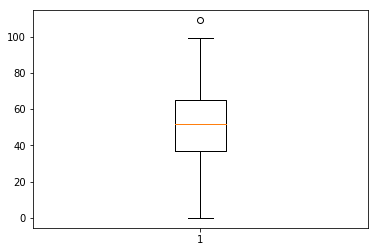

In [379]:
plt.boxplot(cor.Age)

In [380]:
## the age distribution are close to normal
cor.Age.skew()

-0.00973277785313269

In [381]:
## most casses are male
cor['Sex'].value_counts(normalize=True).mul(100)

Male      65.635286
Female    34.364714
Name: Sex, dtype: float64

In [382]:
##the total number of male is 997
cor.Sex.describe()

count     1519
unique       2
top       Male
freq       997
Name: Sex, dtype: object

In [383]:
## spring  has the most infected casses
cor['Season'].value_counts(normalize=True).mul(100)

spring    47.734734
summer    27.971110
winter    12.278398
Autumn    12.015758
Name: Season, dtype: float64

In [384]:
## the total number of infected cases in spring is 727
cor.Season.describe()

count       1523
unique         4
top       spring
freq         727
Name: Season, dtype: object

In [385]:
cor['Infection_Causes'].value_counts(normalize=True).mul(100)

unknown              53.644123
Air                  17.596848
Direct Contact       16.086671
Healthcare Worker    12.672357
Name: Infection_Causes, dtype: float64

In [386]:
cor.Infection_Causes.describe()

count        1523
unique          4
top       unknown
freq          817
Name: Infection_Causes, dtype: object

In [387]:
## most cases in stable state
cor['Medical_state_after'].value_counts(normalize=True).mul(100)

Stable      46.684176
Critical    33.814839
unknown     19.500985
Name: Medical_state_after, dtype: float64

In [388]:
cor.Medical_state_after.describe()

count       1523
unique         3
top       Stable
freq         711
Name: Medical_state_after, dtype: object

In [389]:
## 2015 and 2014 has almost the same number of infection
cor['Infection_Year'].value_counts(normalize=True).mul(100)

2015    45.633618
2014    42.613263
2013    11.162180
2012     0.590939
Name: Infection_Year, dtype: float64

In [390]:
cor.Infection_Year.value_counts()

2015    695
2014    649
2013    170
2012      9
Name: Infection_Year, dtype: int64

In [391]:
cor['Contact_Animal'].value_counts(normalize=True).mul(100)

No     92.514773
Yes     7.485227
Name: Contact_Animal, dtype: float64

In [392]:
cor['Deaths_or_recovered'].value_counts(normalize=True).mul(100)

death        44.517400
unknown      28.562049
recovered    26.920552
Name: Deaths_or_recovered, dtype: float64

In [393]:
## the cases are increasing through years
cor.groupby("Infection_Year")["Deaths_or_recovered"].value_counts()

Infection_Year  Deaths_or_recovered
2012            death                    6
                recovered                2
                unknown                  1
2013            unknown                 74
                death                   67
                recovered               29
2014            death                  261
                unknown                242
                recovered              146
2015            death                  344
                recovered              233
                unknown                118
Name: Deaths_or_recovered, dtype: int64

In [394]:
## the averege age of the female is 50 and the averege age of the male is 52
cor.groupby("Sex")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,522.0,49.524904,18.141805,0.0,34.0,50.0,63.0,98.0
Male,997.0,52.404213,18.142511,0.0,38.0,53.0,66.0,109.0


In [395]:
## the averege age of recovered cases is 45 and the averege age of deceased is 58
cor.groupby("Deaths_or_recovered")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Deaths_or_recovered,,,,,,,,
death,678.0,58.092920,17.554353,0.0,45.25,60.0,72.0,109.0
recovered,410.0,45.512195,16.408332,2.0,32.25,45.0,58.0,99.0
unknown,435.0,46.179310,17.585211,7.0,33.00,45.0,58.5,90.0


In [396]:
## first case in the world was in 2012 and all cases are dead
cor.groupby("Infection_Year")["Deaths_or_recovered"].describe()

,count,unique,top,freq
Infection_Year,,,,
2012,9,3,death,6
2013,170,3,unknown,74
2014,649,3,death,261
2015,695,3,death,344


In [397]:
cor.groupby(['Sex','Medical_state_before'])['Age'].describe()

count       mean        std   min    25%   50%  \
Sex    Medical_state_before                                                   
Female chronic diseases      194.0  60.525773  14.116167  14.0  52.00  60.0   
       good condition        317.0  43.126183  17.013300   0.0  29.00  40.0   
       medical condition       9.0  42.333333  21.725561   2.0  28.00  48.0   
       pregnant                2.0  29.000000   2.828427  27.0  28.00  29.0   
Male   Smoker                  5.0  50.800000  17.210462  31.0  39.00  50.0   
       chronic diseases      470.0  59.293617  16.978695   2.0  48.00  60.0   
       good condition        502.0  45.762948  16.633707   0.0  33.00  45.0   
       medical condition      20.0  57.600000  20.298820  11.0  48.25  60.5   

                               75%    max  
Sex    Medical_state_before                
Female chronic diseases      70.00   98.0  
       good condition        55.00   84.0  
       medical condition     58.00   68.0  
       pregnant              30.00   31.0  
Male   Smoker                59.00   75.0  
       chronic diseases      72.00  109.0  
       good condition        57.00   94.0  
       medical condition     74.25   84.0

In [398]:
cor.groupby(['Sex','Medical_state_before','Medical_state_after'])['Age'].describe()

count       mean        std  \
Sex    Medical_state_before Medical_state_after                                
Female chronic diseases     Critical             110.0  64.163636  12.825238   
                            Stable                70.0  55.357143  14.695001   
                            unknown               14.0  57.785714  13.004015   
       good condition       Critical              31.0  45.967742  17.118185   
                            Stable               201.0  38.144279  14.091277   
                            unknown               85.0  53.870588  18.228567   
       medical condition    Critical               8.0  44.125000  22.503571   
                            Stable                 1.0  28.000000        NaN   
       pregnant             Critical               1.0  31.000000        NaN   
                            Stable                 1.0  27.000000        NaN   
Male   Smoker               Critical               1.0  39.000000        NaN   
                            Stable                 3.0  52.000000  22.068076   
                            unknown                1.0  59.000000        NaN   
       chronic diseases     Critical             273.0  61.549451  16.626253   
                            Stable               175.0  57.388571  16.556691   
                            unknown               22.0  46.454545  17.813123   
       good condition       Critical              76.0  47.171053  17.167712   
                            Stable               251.0  42.003984  14.907045   
                            unknown              175.0  50.542857  17.495718   
       medical condition    Critical              15.0  63.000000  17.312258   
                            Stable                 5.0  41.400000  21.697926   

                                                  min    25%   50%   75%  \
Sex    Medical_state_before Medical_state_after                            
Female chronic diseases     Critical             30.0  56.00  65.0  73.0   
                            Stable               14.0  49.00  56.5  62.5   
                            unknown              36.0  47.00  59.5  66.5   
       good condition       Critical             23.0  34.50  40.0  57.5   
                            Stable                0.0  28.00  35.0  46.0   
                            unknown               7.0  40.00  56.0  68.0   
       medical condition    Critical              2.0  31.50  52.5  59.0   
                            Stable               28.0  28.00  28.0  28.0   
       pregnant             Critical             31.0  31.00  31.0  31.0   
                            Stable               27.0  27.00  27.0  27.0   
Male   Smoker               Critical             39.0  39.00  39.0  39.0   
                            Stable               31.0  40.50  50.0  62.5   
                            unknown              59.0  59.00  59.0  59.0   
       chronic diseases     Critical              2.0  51.00  63.0  74.0   
                            Stable               13.0  47.00  58.0  67.0   
                            unknown               8.0  37.25  43.0  64.0   
       good condition       Critical             10.0  34.00  47.0  58.0   
                            Stable                2.0  31.50  40.0  52.0   
                            unknown               0.0  36.00  51.0  63.0   
       medical condition    Critical             22.0  54.50  63.0  76.0   
                            Stable               11.0  27.00  49.0  59.0   

                                                   max  
Sex    Medical_state_before Medical_state_after         
Female chronic diseases     Critical              90.0  
                            Stable                98.0  
                            unknown               76.0  
       good condition       Critical              81.0  
                            Stable                80.0  
                            unknown               84.0  
   

In [399]:
#### Fill Nans in 'City' coloumn by the most frequntley city that has cases in the country

In [400]:
cor[cor.City.isnull()]

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
9,10.0,United Kingdom,NaN,2013-01-01,winter,Male,60,unknown,Saudi Arabia,No,good condition,unknown,death,2013-02-01,NaN,NaN,1,2013,2.0,2013.0
10,11.0,United Kingdom,NaN,2013-02-01,winter,Male,51,Direct Contact,No,No,chronic diseases,Critical,death,2013-02-01,NaN,NaN,2,2013,2.0,2013.0
11,12.0,United Kingdom,NaN,2013-01-01,winter,Female,51,Direct Contact,No,No,good condition,Stable,recovered,NaT,NaN,NaN,1,2013,NaN,NaN
30,31.0,France,NaN,2013-04-01,spring,Male,64,unknown,United Arab Emirates,No,chronic diseases,Critical,death,2013-05-01,NaN,NaN,4,2013,5.0,2013.0
41,42.0,Tunisia,NaN,2013-05-01,spring,Male,34,Direct Contact,No,No,good condition,Stable,unknown,NaT,NaN,NaN,5,2013,NaN,NaN
42,43.0,Tunisia,NaN,2013-05-01,spring,Female,35,Direct Contact,No,No,good condition,Stable,death,2013-05-01,NaN,NaN,5,2013,5.0,2013.0
79,80.0,United Arab Emirates,NaN,2013-06-01,summer,Male,82,unknown,No,No,chronic diseases,Critical,unknown,NaT,NaN,NaN,6,2013,NaN,NaN
100,101.0,Qatar,NaN,2013-08-01,summer,Male,59,unknown,Saudi Arabia,No,good condition,Stable,recovered,2013-09-01,NaN,NaN,8,2013,9.0,2013.0
101,102.0,Qatar,NaN,2013-08-01,summer,Male,29,unknown,No,No,chronic diseases,Critical,death,2013-09-01,NaN,NaN,8,2013,9.0,2013.0
106,107.0,Tunisia,NaN,2013-05-01,spring,Male,66,unknown,Saudi Arabia,No,good condition,unknown,death,2013-05-01,NaN,NaN,5,2013,5.0,2013.0


In [401]:
## first fill NaNs with 'Uknowon'
cor['City']=cor.City.fillna(value='unknown')

In [402]:
##replace 'Unknown' in 'City' column by the most frequntley city that has cases in the country

In [403]:
cor_country=cor.groupby("Country")

In [404]:
cor_country.City.value_counts()

Country               City            
Algeria               Algeria               2
Austria               Vienna                1
China                 Hong Kong             1
Egypt                 Cairo                 1
France                Paris                 1
                      unknown               1
Germany               unknown               1
Greece                unknown               1
Iran                  Kerman                4
                      Kahnuj                1
                      unknown               1
Italy                 Toscana               1
Jordan                Amman                15
                      Zraqa                 5
                      unknown               2
Kuwait                Kuwait                3
                      unknown               3
Lebanon               Lebanon               1
Malaysia              Johor                 1
Netherlands           unknown               2
Oman                  Dakhla             

In [405]:
##south korea has 186 casses 
cor[cor.Country=="South Korea"]

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
1020,1021.0,South Korea,Incheon,2015-05-01,spring,Male,68,unknown,Bahrain - United Arab Emirates - Saudi Arabia ...,No,good condition,Stable,death,NaT,NaN,NaN,5,2015,NaN,NaN
1021,1022.0,South Korea,Incheon,2015-05-01,spring,Female,64,Direct Contact,No,No,good condition,Stable,death,NaT,NaN,NaN,5,2015,NaN,NaN
1022,1023.0,South Korea,Incheon,2015-05-01,spring,Male,76,Air,No,No,good condition,Stable,death,2015-06-01,NaN,NaN,5,2015,6.0,2015.0
1023,1024.0,South Korea,Incheon,2015-05-01,spring,Female,46,Direct Contact,No,No,good condition,Stable,death,NaT,NaN,NaN,5,2015,NaN,NaN
1024,1025.0,South Korea,Incheon,2015-05-01,spring,Male,50,Healthcare Worker,No,No,good condition,Stable,death,NaT,NaN,NaN,5,2015,NaN,NaN
1025,1026.0,South Korea,Incheon,2015-05-01,spring,Male,71,Air,No,No,chronic diseases,Critical,death,2015-06-01,NaN,NaN,5,2015,6.0,2015.0
1026,1027.0,South Korea,Incheon,2015-05-01,spring,Female,28,Healthcare Worker,No,No,good condition,Stable,death,NaT,NaN,NaN,5,2015,NaN,NaN
1027,1028.0,South Korea,Incheon,2015-05-01,spring,Female,46,Healthcare Worker,No,No,good condition,Stable,death,NaT,NaN,NaN,5,2015,NaN,NaN
1028,1029.0,South Korea,Incheon,2015-05-01,spring,Male,56,Air,No,No,good condition,unknown,unknown,NaT,NaN,NaN,5,2015,NaN,NaN
1029,1030.0,South Korea,Incheon,2015-05-01,spring,Female,79,Air,No,No,chronic diseases,Critical,death,NaT,NaN,NaN,5,2015,NaN,NaN


In [406]:
## Saudi Arabia has 1170 casses
cor[cor.Country=="Saudi Arabia"]

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
1,2.0,Saudi Arabia,Asir,2012-06-01,summer,Male,60,unknown,No,Yes,good condition,unknown,death,2012-06-01,NaN,NaN,6,2012,6.0,2012.0
3,4.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,70,unknown,No,No,good condition,unknown,death,2012-10-01,NaN,NaN,10,2012,10.0,2012.0
4,5.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,16,Direct Contact,No,No,good condition,unknown,unknown,NaT,NaN,NaN,10,2012,NaN,NaN
5,6.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,31,Direct Contact,No,No,good condition,Stable,recovered,2013-11-01,NaN,NaN,10,2012,11.0,2013.0
6,7.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,39,Direct Contact,No,No,good condition,unknown,death,2012-11-01,NaN,NaN,10,2012,11.0,2012.0
12,13.0,Saudi Arabia,Riyadh,2013-06-01,summer,Male,51,unknown,No,No,good condition,unknown,death,2013-02-01,NaN,NaN,6,2013,2.0,2013.0
13,14.0,Saudi Arabia,Riyadh,2013-02-01,winter,Male,69,unknown,No,No,good condition,unknown,death,2013-02-01,NaN,NaN,2,2013,2.0,2013.0
14,15.0,Saudi Arabia,Riyadh,2013-02-01,winter,Male,39,unknown,No,No,good condition,unknown,death,2013-03-01,NaN,NaN,2,2013,3.0,2013.0
15,16.0,Saudi Arabia,Riyadh,2013-03-01,spring,Male,51,Direct Contact,No,No,good condition,Stable,recovered,2013-03-01,NaN,NaN,3,2013,3.0,2013.0
17,18.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,59,unknown,No,No,chronic diseases,Critical,death,2013-04-01,NaN,NaN,4,2013,4.0,2013.0


In [407]:
## there are 122 casses with unkown city in korea 
cor[(cor.Country=="South Korea")&(cor.City=="unknown")].shape

(122, 20)

In [408]:
## fill the unkown city with 'Incheon'
cor.loc[(cor.City=="unknown")&(cor.Country=="South Korea"), 'City'] = 'Incheon'

In [409]:
cor.loc[(cor.City=="South Korea")&(cor.Country=="South Korea"), 'City'] = 'Incheon'

In [410]:
##check the casses in korea
cor[cor.City=="Incheon"].shape

(186, 20)

In [411]:
## fill the NaNs in each country by the same way
cor.loc[(cor.City=="unknown")&(cor.Country=="United Kingdom"), 'City'] = 'London'
cor.loc[(cor.City=="unknown")&(cor.Country=="Germany"), 'City'] = 'Berlin'
cor.loc[(cor.City=="unknown")&(cor.Country=="Greece"), 'City'] = 'Athens'
cor.loc[(cor.City=="unknown")&(cor.Country=="Netherlands"), 'City'] = 'Amsterdam'
cor.loc[(cor.City=="unknown")&(cor.Country=="Spain"), 'City'] = 'Madrid '
cor.loc[(cor.City=="unknown")&(cor.Country=="Tunisia"), 'City'] = 'Tunisia'
cor.loc[(cor.City=="unknown")&(cor.Country=="United States"), 'City'] = 'Washington'
cor.loc[(cor.City=="unknown")&(cor.Country=="United Arab Emirates"), 'City'] = 'Abu dhabi'
cor.loc[(cor.City=="unknown")&(cor.Country=="Qatar"), 'City'] = 'Doha'
cor.loc[(cor.City=="unknown")&(cor.Country=="Oman"), 'City'] = 'Dakhla'
cor.loc[(cor.City=="unknown")&(cor.Country=="Kuwait"), 'City'] = 'Kuwait'
cor.loc[(cor.City=="unknown")&(cor.Country=="France"), 'City'] = 'Paris'
cor.loc[(cor.City=="unknown")&(cor.Country=="Jordan"), 'City'] = 'Amman'
cor.loc[(cor.City=="unknown")&(cor.Country=="Iran"), 'City'] = 'Kerman'

In [412]:
cor[cor.City=="unknown"]

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year


In [413]:
cor.isnull().sum().sort_values()

ID                             0
Infection_Year                 0
Infection_Month                0
Deaths_or_recovered            0
Medical_state_after            0
Medical_state_before           0
Traveling                      0
Contact_Animal                 0
Age                            0
Season                         0
Month_of_infection             0
City                           0
Country                        0
Infection_Causes               0
Sex                            4
Death_Month                  640
Month_of_death_recovered     640
Death_Year                   640
Notes                       1000
Unnamed: 20                 1510
dtype: int64

In [414]:
## we notice there is a mistake a case from "United States" in city column(city="Riyadh")
cor[(cor.City=="Riyadh")&(cor.Country=="United States")]

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year
427,428.0,United States,Riyadh,2014-04-01,spring,Male,60,unknown,Saudi Arabia,No,good condition,Stable,death,NaT,NaN,NaN,4,2014,NaN,NaN


In [415]:
## replace the city from "Riyadh" to "United States"
cor.loc[(cor.City=="Riyadh")&(cor.Country=="United States"), 'City'] = 'Washington'

In [416]:
cor[(cor.City=="Riyadh")&(cor.Country=="United States")]

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Unnamed: 20,Infection_Month,Infection_Year,Death_Month,Death_Year


In [417]:
##drop the missing value in 'Sex' column
cor = cor.dropna(subset=['Sex'])

In [418]:
## drop unuseful column
del cor["Unnamed: 20"]

In [419]:
cor.isnull().sum().sort_values()

ID                            0
Infection_Year                0
Infection_Month               0
Deaths_or_recovered           0
Medical_state_after           0
Medical_state_before          0
Traveling                     0
Contact_Animal                0
Age                           0
Sex                           0
Season                        0
Month_of_infection            0
City                          0
Country                       0
Infection_Causes              0
Death_Month                 636
Month_of_death_recovered    636
Death_Year                  636
Notes                       996
dtype: int64

In [420]:
cor.Notes.unique()

array([nan, 'تلقى العلاج في المانيا', 'تلقي العلاج في ميونخ 19/3/2013',
       '17 صفر', 'اعراض خفيفة', 'دخلت المستشفي في 14/11/2013',
       'دخل المستشفي في 13/11/2013', 'محتجز في مكان العزل في المستشفى ',
       'نقل للمستشفى في 14/12/2013', 'دخل المستشفى 26/12/2013',
       '21 ربيع الثاني', '21 محرم', '1 شعبان', '13 شعبان', '30 رجب',
       'بعد اصابته سافر مصر ', '1 ربيع الثاني', '6 جماد الأول',
       '3 ربيع الثاني', '19 شعبان', '7 شعبان', '3 شعبان', ' 4جماد الأول',
       '18 شعبان', '23 ربيع الثاني', '6 شعبان', '5 شعبان', '10 شعبان',
       '11 شعبان', '12 شعبان', '24 شوال', '16 شعبان', '21 شعبان',
       '2 محرم', '4 محرم', '5 ذو الحجة', '25 ذو الحجة', '26 ربيع الأول',
       'The MERS-CoV infection was laboratory confirmed on 29 September 2014 by RT-PCR targeting 2 distinct targets. A further target was confirmed positive on 30 September 2014.',
       '22 صفر', '6 محرم', '11 محرم', '1 محرم', '7 محرم', '18 محرم',
       '8 محرم', '9 محرم', '5 محرم', '3 صفر', '19 محرم', '13 

In [421]:
## replace the values in 'Traveling' column with yes
cor['Traveling']=cor['Traveling'].replace({'Saudi Arabia':'Yes','Oman':'Yes','Jordan':'Yes','United Arab Emirates':'Yes','Philippines':'Yes','Gulf Country':'Yes','Yemen':'Yes','Bahrain - United Arab Emirates - Saudi Arabia - Qatar - Korea':'Yes','Singapore - Malaysia - Dubai -Saudi Arabia':'Yes'})

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [422]:
## save the dataset in another file
cor.to_excel("Corona cluster1.xlsx")

### Make a new dataframe contain the death and recovered casses  

In [423]:
my_dataframe = cor[cor.Deaths_or_recovered != 'unknown']
my_dataframe.shape

(1088, 19)

In [424]:
## percentage of death and recovered
my_dataframe['Deaths_or_recovered'].value_counts(normalize=True).mul(100)

death        62.316176
recovered    37.683824
Name: Deaths_or_recovered, dtype: float64

In [425]:
## number of death and recovered
my_dataframe['Deaths_or_recovered'].value_counts()

death        678
recovered    410
Name: Deaths_or_recovered, dtype: int64

In [426]:
## creat a new column (mapping death with 0 and recovered with 1)
my_dataframe["Survived"]=my_dataframe.Deaths_or_recovered.map({"death":0,"recovered":1})

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [427]:
## creat a new column of age bins
my_dataframe['Age_bins'] = pd.cut(my_dataframe['Age'], bins=[-1,18,55,109], labels=['child', 'adult', 'old'])

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [428]:
my_dataframe[my_dataframe.Age_bins.isnull()]

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,...,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Infection_Month,Infection_Year,Death_Month,Death_Year,Survived,Age_bins


In [429]:
##explore the data frame columns
my_dataframe.columns

Index(['ID', 'Country', 'City', 'Month_of_infection', 'Season', 'Sex', 'Age',
       'Infection_Causes', 'Traveling', 'Contact_Animal',
       'Medical_state_before', 'Medical_state_after', 'Deaths_or_recovered',
       'Month_of_death_recovered', 'Notes', 'Infection_Month',
       'Infection_Year', 'Death_Month', 'Death_Year', 'Survived', 'Age_bins'],
      dtype='object')

## the total number of cases per country

In [430]:
## Saudi Arabia has 1172 cases
cor_saudi= cor[cor.Country=="Saudi Arabia"]
cor_saudi

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Infection_Month,Infection_Year,Death_Month,Death_Year
1,2.0,Saudi Arabia,Asir,2012-06-01,summer,Male,60,unknown,No,Yes,good condition,unknown,death,2012-06-01,NaN,6,2012,6.0,2012.0
3,4.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,70,unknown,No,No,good condition,unknown,death,2012-10-01,NaN,10,2012,10.0,2012.0
4,5.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,16,Direct Contact,No,No,good condition,unknown,unknown,NaT,NaN,10,2012,NaN,NaN
5,6.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,31,Direct Contact,No,No,good condition,Stable,recovered,2013-11-01,NaN,10,2012,11.0,2013.0
6,7.0,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,39,Direct Contact,No,No,good condition,unknown,death,2012-11-01,NaN,10,2012,11.0,2012.0
12,13.0,Saudi Arabia,Riyadh,2013-06-01,summer,Male,51,unknown,No,No,good condition,unknown,death,2013-02-01,NaN,6,2013,2.0,2013.0
13,14.0,Saudi Arabia,Riyadh,2013-02-01,winter,Male,69,unknown,No,No,good condition,unknown,death,2013-02-01,NaN,2,2013,2.0,2013.0
14,15.0,Saudi Arabia,Riyadh,2013-02-01,winter,Male,39,unknown,No,No,good condition,unknown,death,2013-03-01,NaN,2,2013,3.0,2013.0
15,16.0,Saudi Arabia,Riyadh,2013-03-01,spring,Male,51,Direct Contact,No,No,good condition,Stable,recovered,2013-03-01,NaN,3,2013,3.0,2013.0
17,18.0,Saudi Arabia,Alhasa,2013-04-01,spring,Male,59,unknown,No,No,chronic diseases,Critical,death,2013-04-01,NaN,4,2013,4.0,2013.0


In [431]:
## the number of cases in Suadi Arabia per City
saudi_count=cor_saudi.City.value_counts()
saudi_count

Riyadh              532
Jeddah              206
Hafuf                56
Madinah              51
Taif                 49
Mecca                36
Alhasa               27
Najran               24
Eastren Region       24
Hafar AlBatin        17
AlKharj              15
Buraidah             13
Aljouf               12
Tabuk                12
Khobar               10
Qunfudhah             9
Asir                  8
Dammam                7
Jubail                5
Dahran                4
Wadi aldawaser        3
Skaka                 3
Quwaiya               2
Hail                  2
Alkhafji              2
Alnumas               2
Aldilam               2
Onaizah               2
Aloyon                2
Al-Dawadmi            2
Quriyat               2
Alras                 2
Arar                  2
Tarabh                2
Taima                 2
Shaqra                1
AlQahmah              1
Huraymila             1
Qassim                1
Harad                 1
Albadaya              1
Hawtat bni Tamim

In [432]:
## UAE has 78 cases
cor_UAE=cor[cor.Country=="United Arab Emirates"]
cor_UAE

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Infection_Month,Infection_Year,Death_Month,Death_Year
16,17.0,United Arab Emirates,Abu dhabi,2013-03-01,spring,Male,73,unknown,No,No,good condition,unknown,death,2013-03-01,تلقي العلاج في ميونخ 19/3/2013,3,2013,3.0,2013.0
79,80.0,United Arab Emirates,Abu dhabi,2013-06-01,summer,Male,82,unknown,No,No,chronic diseases,Critical,unknown,NaT,NaN,6,2013,NaN,NaN
82,83.0,United Arab Emirates,Abu dhabi,2013-06-01,summer,Male,28,Healthcare Worker,No,No,good condition,Stable,unknown,NaT,NaN,6,2013,NaN,NaN
83,84.0,United Arab Emirates,Abu dhabi,2013-06-01,summer,Female,30,Healthcare Worker,No,No,good condition,Stable,unknown,NaT,NaN,6,2013,NaN,NaN
84,85.0,United Arab Emirates,Abu dhabi,2013-06-01,summer,Female,30,Healthcare Worker,No,No,good condition,Stable,unknown,NaT,NaN,6,2013,NaN,NaN
85,86.0,United Arab Emirates,Abu dhabi,2013-06-01,summer,Female,40,Healthcare Worker,No,No,good condition,Stable,unknown,NaT,NaN,6,2013,NaN,NaN
159,160.0,United Arab Emirates,Abu dhabi,2013-11-01,Autumn,Female,32,unknown,No,No,good condition,unknown,death,2013-12-01,NaN,11,2013,12.0,2013.0
160,161.0,United Arab Emirates,Abu dhabi,2013-11-01,Autumn,Male,38,unknown,No,No,chronic diseases,unknown,unknown,NaT,NaN,11,2013,NaN,NaN
161,162.0,United Arab Emirates,Abu dhabi,2013-11-01,Autumn,Male,8,Direct Contact,No,No,chronic diseases,unknown,unknown,NaT,NaN,11,2013,NaN,NaN
164,165.0,United Arab Emirates,Sharjah,2013-12-01,Autumn,Male,68,unknown,No,No,good condition,unknown,death,2013-12-01,NaN,12,2013,12.0,2013.0


In [433]:
## the number of cases in UAE per City
cor_UAE.City.value_counts()

Abu dhabi         71
Eastren Region     3
Sharjah            2
AlAin              1
Dubai              1
Name: City, dtype: int64

In [434]:
##Qatar has 13 cases
cor_Qatar=cor[cor.Country=="Qatar"]
cor_Qatar

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Infection_Month,Infection_Year,Death_Month,Death_Year
0,1.0,Qatar,Doha,2012-09-01,Autumn,Male,49,unknown,Yes,No,good condition,unknown,death,2013-06-01,NaN,9,2012,6.0,2013.0
2,3.0,Qatar,Doha,2012-10-01,Autumn,Male,51,unknown,No,No,good condition,Stable,recovered,NaT,تلقى العلاج في المانيا,10,2012,NaN,NaN
100,101.0,Qatar,Doha,2013-08-01,summer,Male,59,unknown,Yes,No,good condition,Stable,recovered,2013-09-01,NaN,8,2013,9.0,2013.0
101,102.0,Qatar,Doha,2013-08-01,summer,Male,29,unknown,No,No,chronic diseases,Critical,death,2013-09-01,NaN,8,2013,9.0,2013.0
107,108.0,Qatar,Doha,2013-08-01,summer,Female,56,unknown,No,No,chronic diseases,Critical,death,2013-08-01,NaN,8,2013,8.0,2013.0
141,142.0,Qatar,Doha,2013-10-01,Autumn,Male,61,unknown,No,Yes,chronic diseases,Critical,death,2013-11-01,NaN,10,2013,11.0,2013.0
147,148.0,Qatar,Doha,2013-10-01,Autumn,Male,23,unknown,No,No,good condition,Stable,death,2013-11-01,NaN,10,2013,11.0,2013.0
762,763.0,Qatar,Doha,2014-10-01,Autumn,Male,71,unknown,Yes,Yes,chronic diseases,Critical,recovered,2014-10-01,NaN,10,2014,10.0,2014.0
763,764.0,Qatar,Doha,2014-10-01,Autumn,Male,43,unknown,No,Yes,good condition,Stable,recovered,2014-10-01,NaN,10,2014,10.0,2014.0
843,844.0,Qatar,Shahanea,2015-02-01,winter,Male,55,unknown,No,Yes,good condition,Stable,unknown,NaT,NaN,2,2015,NaN,NaN


In [435]:
## the number of cases in Qatar per City
cor_Qatar.City.value_counts()

Doha        11
Shahanea     2
Name: City, dtype: int64

In [436]:
cor_Jordan=cor[cor.Country=="Jordan"]
cor_Jordan

,ID,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Notes,Infection_Month,Infection_Year,Death_Month,Death_Year
7,8.0,Jordan,Zraqa,2012-03-01,spring,Male,25,unknown,No,No,good condition,unknown,death,2013-04-01,NaN,3,2012,4.0,2013.0
8,9.0,Jordan,Zraqa,2012-04-01,spring,Female,40,Healthcare Worker,No,No,good condition,unknown,death,2013-04-01,NaN,4,2012,4.0,2013.0
178,179.0,Jordan,Amman,2013-12-01,winter,Male,48,Air,No,No,chronic diseases,Critical,death,2014-01-01,NaN,12,2013,1.0,2014.0
426,427.0,Jordan,Amman,2014-04-01,spring,Male,28,unknown,No,No,good condition,unknown,unknown,NaT,NaN,4,2014,NaN,NaN
429,430.0,Jordan,Zraqa,2014-04-01,spring,Male,28,Healthcare Worker,No,No,good condition,Stable,death,NaT,NaN,4,2014,NaN,NaN
430,431.0,Jordan,Zraqa,2014-03-01,winter,Male,56,unknown,No,No,good condition,unknown,death,2014-03-01,NaN,3,2014,3.0,2014.0
447,448.0,Jordan,Zraqa,2014-05-01,spring,Male,50,Direct Contact,No,No,good condition,Stable,death,NaT,NaN,5,2014,NaN,NaN
454,455.0,Jordan,Amman,2014-05-01,spring,Male,69,Air,No,No,chronic diseases,Critical,death,NaT,NaN,5,2014,NaN,NaN
677,678.0,Jordan,Amman,2014-05-01,spring,Male,26,Healthcare Worker,No,No,good condition,Stable,death,NaT,NaN,5,2014,NaN,NaN
1380,1381.0,Jordan,Amman,2015-08-01,summer,Male,76,Air,No,No,chronic diseases,Critical,death,2015-08-01,NaN,8,2015,8.0,2015.0


In [437]:
## the number of cases in Jordan per City
cor_Jordan.City.value_counts()

Amman    17
Zraqa     5
Name: City, dtype: int64

In [438]:
cor_cases=cor.groupby("Deaths_or_recovered")

 ## Data Visualization

Text(0.5, 1.0, 'Total number of deceased and recovered cases')

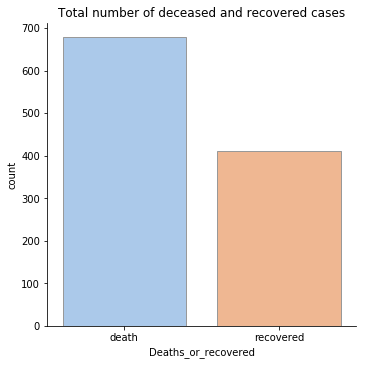

In [439]:
sns.catplot(x="Deaths_or_recovered", kind="count",
            palette="pastel", edgecolor=".6",
            data=my_dataframe);
plt.title("Total number of deceased and recovered cases")

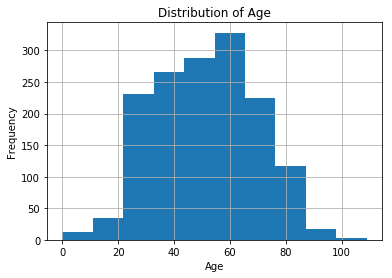

In [440]:
cor.Age.hist()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

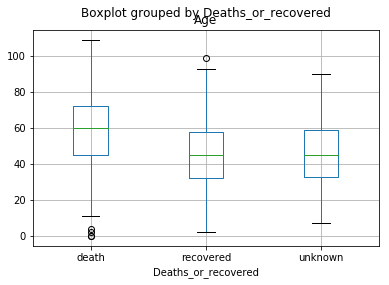

In [441]:
cor.boxplot(column='Age', by='Deaths_or_recovered');

Text(0.5, 1.0, 'Age distribution across sex')

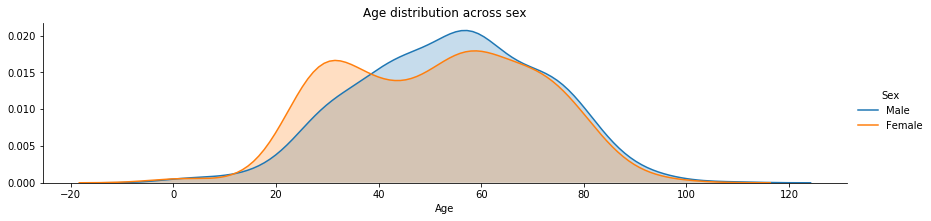

In [442]:
age_sex = sns.FacetGrid(my_dataframe, hue="Sex", aspect=4)
age_sex.map(sns.kdeplot, "Age", shade=True).add_legend()
plt.title("Age distribution across sex")

Text(0.5, 1.0, 'Age distribution across deceased or recovered')

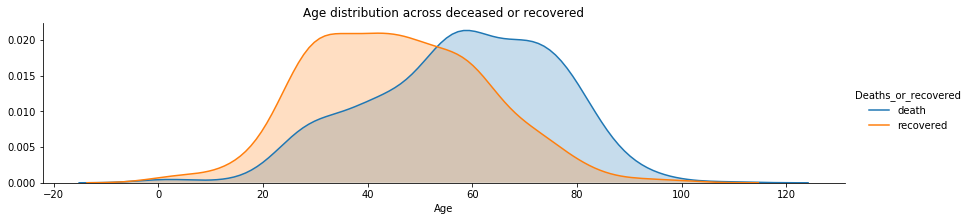

In [443]:
age_sex = sns.FacetGrid(my_dataframe, hue="Deaths_or_recovered", aspect=4)
age_sex.map(sns.kdeplot, "Age", shade=True).add_legend()
plt.title("Age distribution across deceased or recovered")


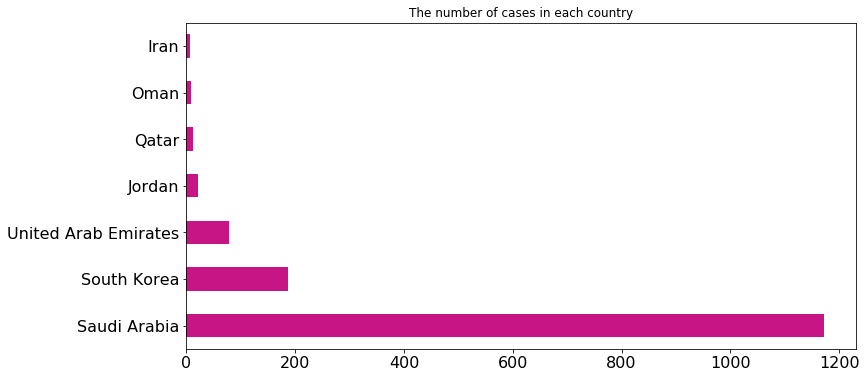

In [444]:
cor['Country'].value_counts().head(7).plot(kind='barh',figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16)
plt.title("The number of cases in each country")
plt.savefig('Total number of cases in each country')

Text(0.5, 1.0, 'Total number of cases in Saudi Arabia ')

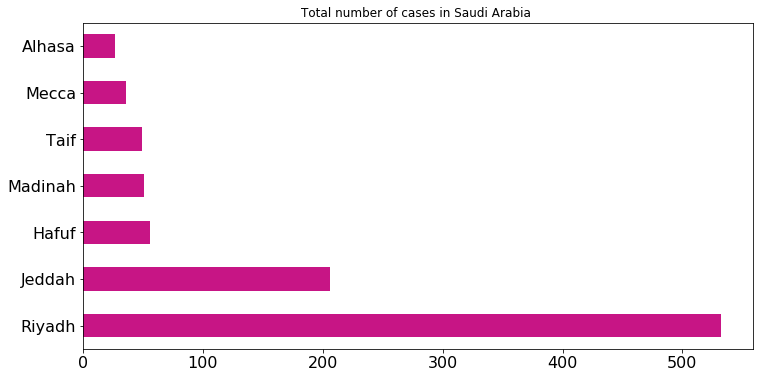

In [445]:
cor_saudi['City'].value_counts().head(7).plot(kind='barh',figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16)
plt.title("Total number of cases in Saudi Arabia ")

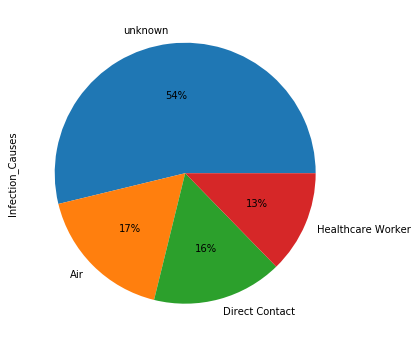

In [488]:
cor['Infection_Causes'].value_counts(normalize=True).mul(100).plot(kind="pie",figsize=(12, 6),autopct='%1.0f%%')

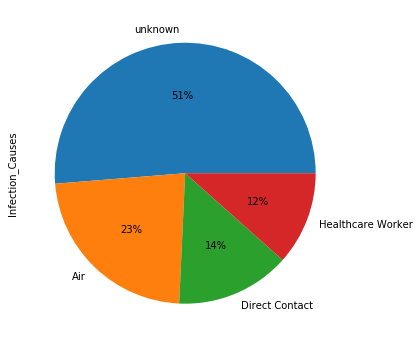

In [489]:
my_dataframe['Infection_Causes'].value_counts(normalize=True).mul(100).plot(kind="pie",figsize=(12, 6),autopct='%1.0f%%')

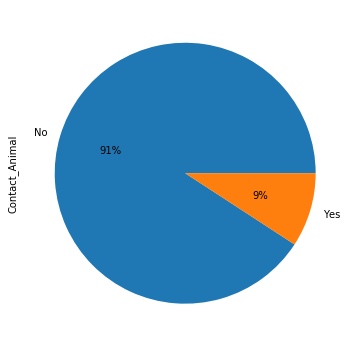

In [487]:
my_dataframe['Contact_Animal'].value_counts(normalize=True).mul(100).plot(kind="pie",figsize=(12, 6),autopct='%1.0f%%')

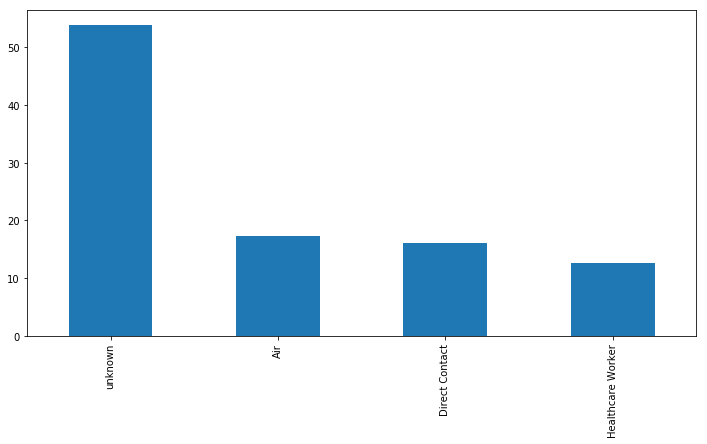

In [482]:
cor['Infection_Causes'].value_counts(normalize=True).mul(100).plot(kind="bar",figsize=(12, 6))

Text(0.5, 1.0, 'Total number of male and female in each Medical state before get infected')

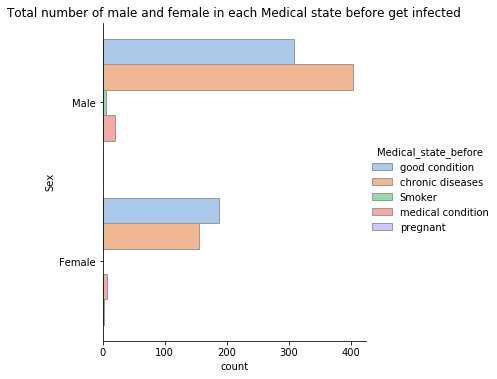

In [446]:
sns.catplot(y="Sex", hue="Medical_state_before", kind="count",
            palette="pastel", edgecolor=".6",
            data=my_dataframe);
plt.title("Total number of male and female in each Medical state before get infected")

Text(0.5, 1.0, 'Total number of deceased and recovered among Sex')

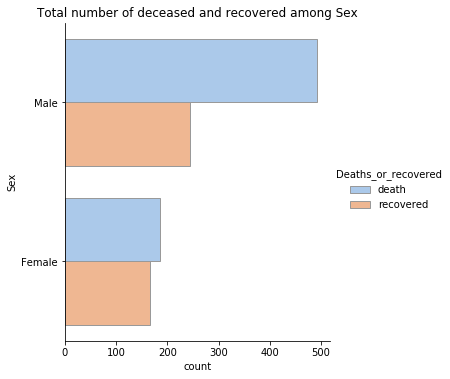

In [447]:
sns.catplot(y="Sex", hue="Deaths_or_recovered", kind="count",
            palette="pastel", edgecolor=".6",
            data=my_dataframe);
plt.title("Total number of deceased and recovered among Sex")

Text(0.5, 1.0, 'Total number of male and female by each Infection Causes')

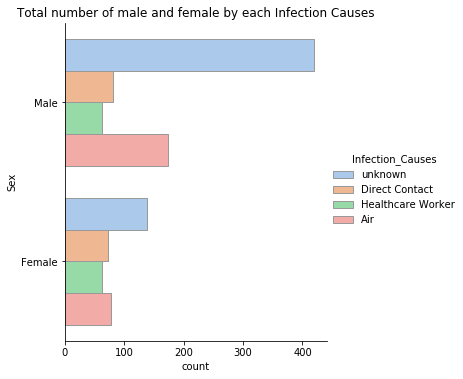

In [448]:
sns.catplot(y="Sex", hue="Infection_Causes", kind="count",
            palette="pastel", edgecolor=".6",
            data=my_dataframe);
plt.title("Total number of male and female by each Infection Causes")

Text(0.5, 1.0, 'Total number of male and female in each Medical state after getting infected')

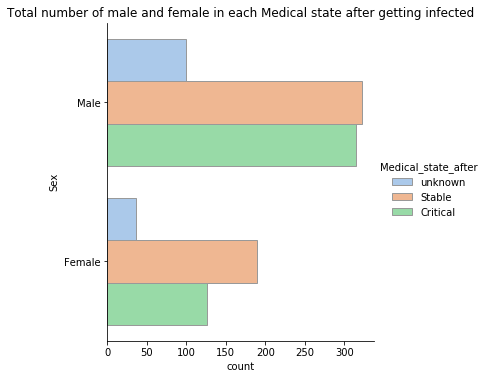

In [449]:
sns.catplot(y="Sex", hue="Medical_state_after", kind="count",
            palette="pastel", edgecolor=".6",
            data=my_dataframe);
plt.title("Total number of male and female in each Medical state after getting infected")

C:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


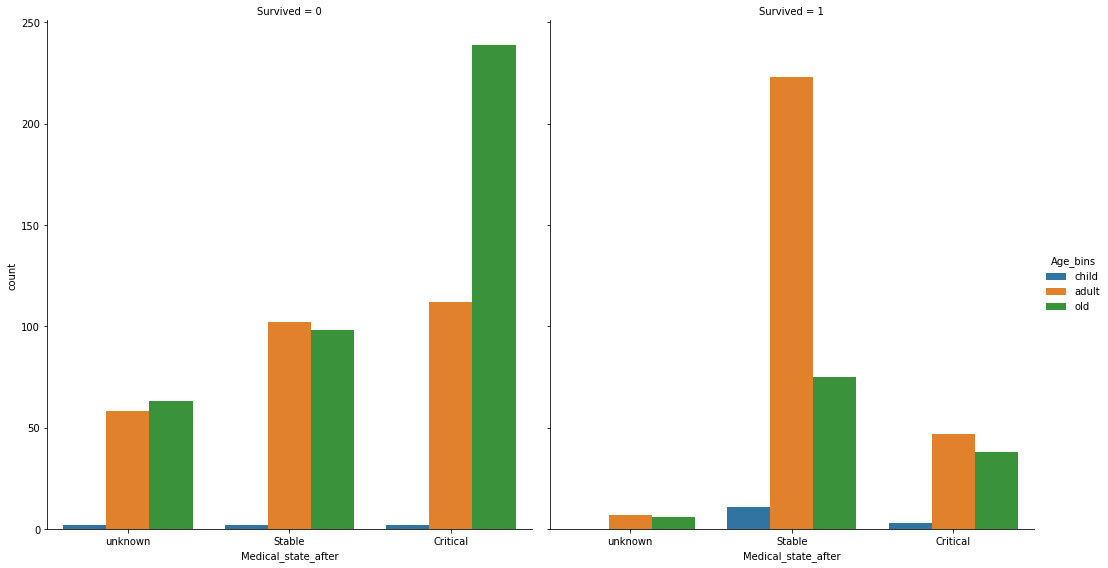

In [450]:
sns.factorplot(x="Medical_state_after", hue="Age_bins", col="Survived", data=my_dataframe, kind="count",size=8, aspect=.9)

C:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


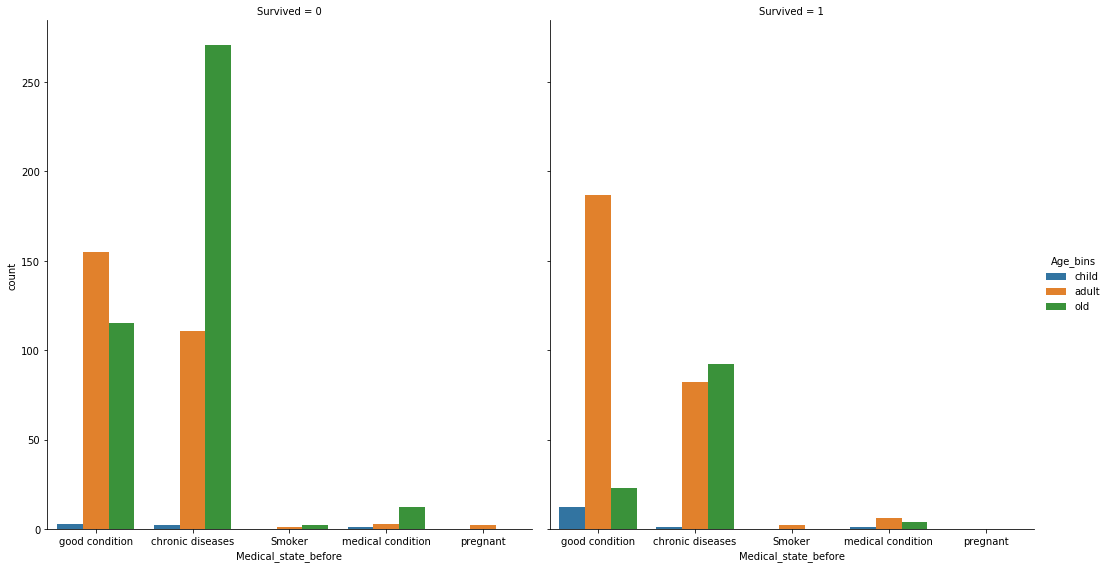

In [451]:
sns.factorplot(x="Medical_state_before", hue="Age_bins", col="Survived", data=my_dataframe, kind="count",size=8, aspect=.9)

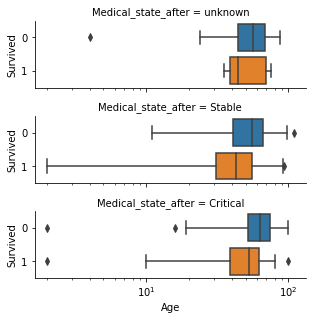

In [452]:
ax = sns.catplot(x="Age", y="Survived", row="Medical_state_after",
                kind="box", orient="h", height=1.5, aspect=3,
                data=my_dataframe.query("Age > 0"))
ax.set(xscale="log");

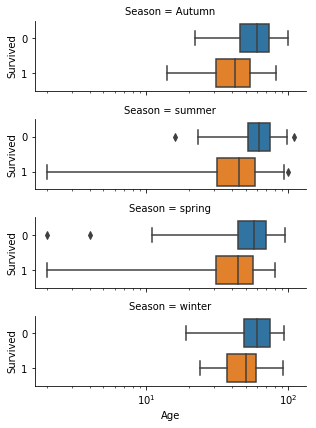

In [453]:
ax = sns.catplot(x="Age", y="Survived", row="Season",
                kind="box", orient="h", height=1.5, aspect=3,
                data=my_dataframe.query("Age > 0"))
ax.set(xscale="log");

Text(0.5, 1.0, 'Total number of male and female was infected in each season')

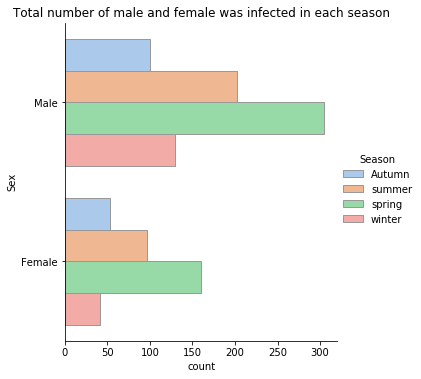

In [454]:
sns.catplot(y="Sex", hue="Season", kind="count",
            palette="pastel", edgecolor=".6",
            data=my_dataframe);
plt.title("Total number of male and female was infected in each season")

C:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


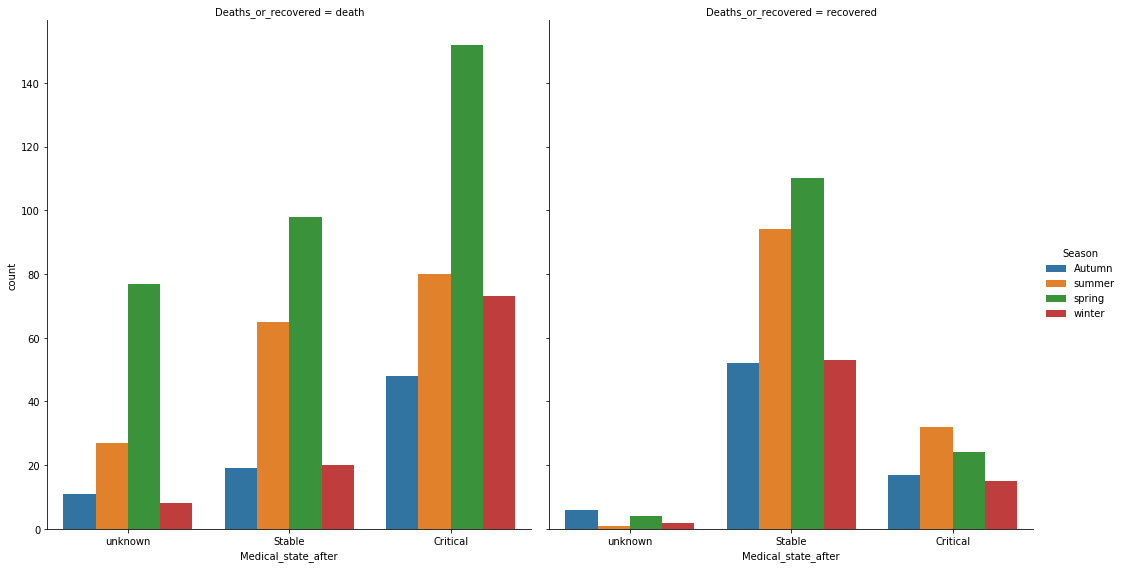

In [455]:
sns.factorplot(x="Medical_state_after", hue="Season", col="Deaths_or_recovered", data=my_dataframe, kind="count",size=8, aspect=.9)

C:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


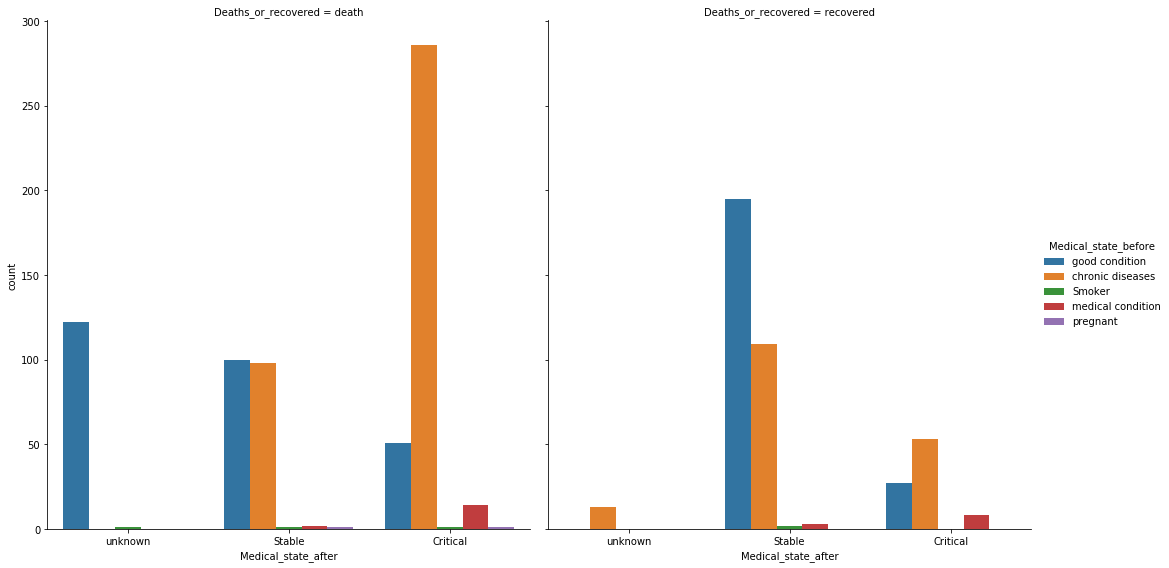

In [456]:
sns.factorplot(x="Medical_state_after", hue="Medical_state_before", col="Deaths_or_recovered", data=my_dataframe, kind="count",size=8, aspect=.9)

Text(0.5, 1.0, 'The number of child,adult and old was survival')

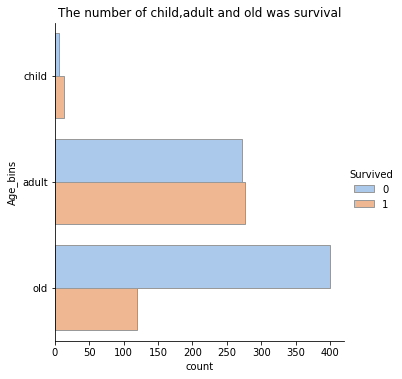

In [457]:
sns.catplot(y="Age_bins", hue="Survived", kind="count",
            palette="pastel", edgecolor=".6",
            data=my_dataframe);
plt.title("The number of child,adult and old was survival")

Text(0.5, 1.0, 'The number of infected cases for each season')

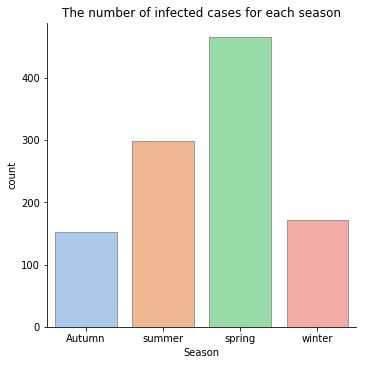

In [458]:
sns.catplot(x="Season", kind="count",
            palette="pastel", edgecolor=".6",
            data=my_dataframe);
plt.title("The number of infected cases for each season")

Text(0.5, 1.0, 'Total number of deceased and recovered cases for each season')

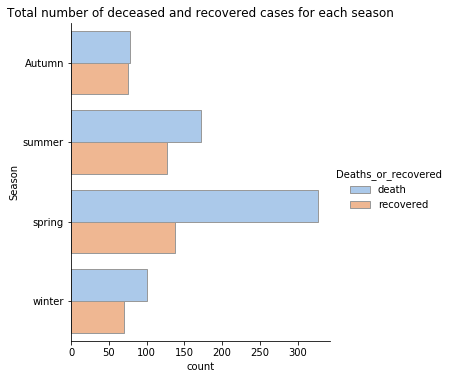

In [459]:
sns.catplot(y="Season" ,hue="Deaths_or_recovered",kind="count",
            palette="pastel", edgecolor=".6",
            data=my_dataframe);
plt.title("Total number of deceased and recovered cases for each season")

Text(0.5, 1.0, 'Total number of deceased and recovered cases for each Year')

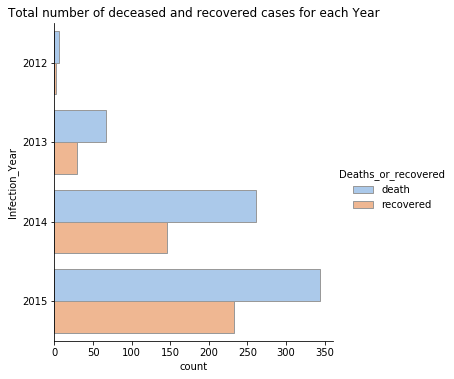

In [460]:
sns.catplot(y="Infection_Year",hue="Deaths_or_recovered" ,kind="count",
            palette="pastel", edgecolor=".6",
            data=my_dataframe);
plt.title("Total number of deceased and recovered cases for each Year")

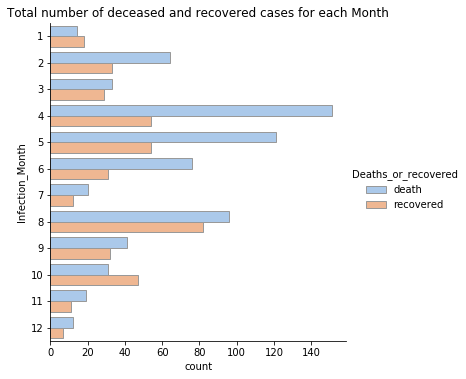

In [461]:
sns.catplot(y='Infection_Month',hue="Deaths_or_recovered" ,kind="count",
           palette="pastel", edgecolor=".6",
           data=my_dataframe);
plt.title("Total number of deceased and recovered cases for each Month")
plt.savefig('death or recovered Months.png',bbox_inches='tight')

## my dataset

In [462]:
## replace the values in 'Traveling' column with yes
my_dataframe['Traveling']=my_dataframe['Traveling'].replace({'Saudi Arabia':'Yes','Oman':'Yes','Jordan':'Yes','United Arab Emirates':'Yes','Philippines':'Yes','Gulf Country':'Yes','Yemen':'Yes','Bahrain - United Arab Emirates - Saudi Arabia - Qatar - Korea':'Yes','Singapore - Malaysia - Dubai -Saudi Arabia':'Yes'})

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [479]:
my_dataframe.Traveling.value_counts(normalize=True).mul(100)

No     95.496324
Yes     4.503676
Name: Traveling, dtype: float64

In [464]:
my_dataframe.Traveling.value_counts()

No     1039
Yes      49
Name: Traveling, dtype: int64

In [465]:
##drop unuseful columns

In [466]:
del my_dataframe['Notes']

In [467]:
del my_dataframe['ID']

In [468]:
## save the dataset in another file
my_dataframe.to_excel("Corona New.xlsx")

## cumulative curve for the total cases and death cases

In [469]:
my_dataframe.shape

(1088, 19)

In [470]:
my_dataframe.Deaths_or_recovered.value_counts()

death        678
recovered    410
Name: Deaths_or_recovered, dtype: int64

In [471]:
my_dataframe1=cor.groupby("Deaths_or_recovered")
my_dataframe1.Infection_Year.value_counts()

Deaths_or_recovered  Infection_Year
death                2015              344
                     2014              261
                     2013               67
                     2012                6
recovered            2015              233
                     2014              146
                     2013               29
                     2012                2
unknown              2014              242
                     2015              118
                     2013               70
                     2012                1
Name: Infection_Year, dtype: int64

In [472]:
my_dataframe.Infection_Year.value_counts()

2015    577
2014    407
2013     96
2012      8
Name: Infection_Year, dtype: int64

In [473]:
count_cases = 1088
death_cases=678
corona_data = {'years_of_get_infected': [2012, 2013,2014, 2015], 
                   'count_of_cases': [8, 96, 407, 577],
              'count_of_death':[6,67,261,344]}
df = pd.DataFrame(data=corona_data)

In [474]:
df.head()

,years_of_get_infected,count_of_cases,count_of_death
0,2012,8,6
1,2013,96,67
2,2014,407,261
3,2015,577,344


In [475]:
df['count_of_cases_total'] = df['count_of_cases'].cumsum()

In [476]:
df['count_of_death_total'] = df['count_of_death'].cumsum()

In [477]:
df

,years_of_get_infected,count_of_cases,count_of_death,count_of_cases_total,count_of_death_total
0,2012,8,6,8,6
1,2013,96,67,104,73
2,2014,407,261,511,334
3,2015,577,344,1088,678


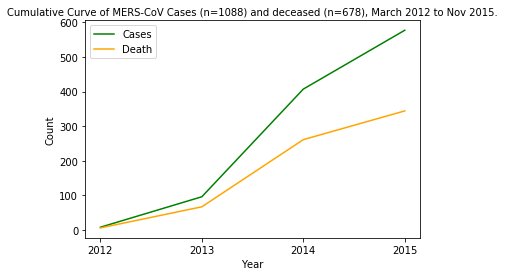

In [478]:
x1=["2012", "2013","2014", "2015"]
y1=[8, 96, 407, 577]
y2=[6,67,261,344]
plt.plot(x1, y1, color='g',label="Cases")
plt.plot(x1, y2, color='orange',label="Death")
plt.title("Cumulative Curve of MERS-CoV Cases (n=1088) and deceased (n=678), March 2012 to Nov 2015.", fontsize=10)
plt.ylabel("Count")
plt.xlabel("Year")
plt.legend();
plt.show()